**Climate Dynamics and Crop Yield: A Phenological Machine Learning Approach**

Introduction

This project integrates climatic and agricultural datasets to analyze how environmental variability shapes the biological performance of maize across 85 municipalities in Jalisco, Mexico, between 2003 and 2024. By combining remote-sensing climate data from NASA POWER (https://power.larc.nasa.gov/data-access-viewer/
) with official agricultural statistics from SIAP’s Cierre Agrícola (https://nube.agricultura.gob.mx/cierre_agricola/
), this notebook reconstructs a multi-scale agroclimatic model that links physical climate signals to biological productivity and phenological behavior in maize.

Data Sources

NASA POWER – Climate Parameters
The NASA POWER (Prediction Of Worldwide Energy Resources) dataset provides monthly climate variables with global satellite consistency. The selected parameters describe energy balance, radiation, and thermal dynamics influencing photosynthesis, evapotranspiration, and crop stress:

Radiation variables:
ALLSKY_SFC_SW_DWN (total shortwave radiation),
CLRSKY_SFC_SW_DWN (clear-sky radiation),
ALLSKY_SFC_SW_DNI (direct solar irradiance),
ALLSKY_SFC_SW_DIFF (diffuse radiation),
ALLSKY_SRF_ALB (surface albedo),
TOA_SW_DWN (top-of-atmosphere radiation),
CLOUD_AMT (cloud fraction),
ALLSKY_SFC_PAR_TOT and CLRSKY_SFC_PAR_TOT (photosynthetically active radiation, PAR),
ALLSKY_SFC_UVA, ALLSKY_SFC_UVB, ALLSKY_SFC_UV_INDEX (ultraviolet exposure),
ALLSKY_SFC_LW_DWN (downward longwave radiation).

Temperature and moisture variables:
T2M (air temperature at 2 m),
T2MDEW (dew point temperature),
T2MWET (wet-bulb temperature, indicator of thermal stress),
TS (surface skin temperature),
T2M_RANGE, T2M_MAX, T2M_MIN (diurnal thermal range, maximum, and minimum).

These variables provide a biophysical profile of the crop’s environment, quantifying the amount of energy, heat, and radiation absorbed during each developmental phase.

SIAP – Cierre Agrícola (Secretaría de Agricultura y Desarrollo Rural, México)
The SIAP dataset provides the agricultural outcomes at municipal resolution, containing:

Superficie (total sown area, ha)

Superficie Cosechada (harvested area, ha)

Superficie Siniestrada (damaged area, ha)

Producción (total output, tons)

Rendimiento (yield, tons/ha)

PMR (rural market price)

Valor de Producción (total production value).

These metrics represent the physiological response of maize populations to environmental constraints—essentially, the biological translation of climate into productivity.

Methodological Framework

The notebook follows a multi-stage computational pipeline designed to capture both climatic variability and biological response mechanisms:

Data Integration and Cleaning
NASA and SIAP data are harmonized by municipality and year. Missing or noisy data are corrected through statistical imputation to ensure consistency across time (2003–2024).

Exploratory Data Analysis (EDA)
Statistical summaries, histograms, and correlation matrices help uncover the dominant climatic gradients and their first-order relationships with yield.

Phenological Modeling
The code reconstructs four phenological windows — Emergence, Vegetative Growth, Flowering, and Grain Fill.
Each window captures a distinct biological process:

Emergence: germination, early photosynthetic establishment, and root development.

Vegetative Growth: canopy expansion, nutrient assimilation, and energy capture.

Flowering: reproductive differentiation, highly sensitive to temperature and water stress.

Grain Fill: carbohydrate accumulation and maturation.

For each phase, the model computes descriptive statistics (mean, standard deviation, maximum, cumulative sum) across all climatic variables to approximate energy and stress dynamics.

Machine Learning and Criticality Mapping
Using Random Forest Regressors, the model quantifies the relative importance of each climate variable within each phenological window.
The output is a Criticality Map—a heatmap showing which climatic factors (e.g., temperature range, radiation, cloud cover) exert the greatest biological control on yield.
This provides a mechanistic interpretation of resilience and vulnerability across stages of plant development.

Detrended Yield Analysis (Yield Deviation)
To isolate pure climate-driven effects, long-term technological and management trends are removed. The residual yield deviations are used to detect anomalous seasons caused by climatic extremes rather than agronomic practices.

Dynamic Climate-State Modeling
Through K-Means clustering and NetworkX graph analysis, the notebook models transitions between distinct “climatic states” over the years.
This captures the temporal stability of environmental regimes, comparing the path dependency between high-yield and low-yield years—an approach inspired by systems biology and network ecology.

Biological Innovation and Conceptual Relevance

From a biological standpoint, this methodology is innovative because it bridges phenological physiology and computational intelligence:

It treats climate not as a static set of averages but as a dynamic sequence of energy and stress pulses influencing each developmental phase.

The phenological window model mimics the biological rhythm of maize, integrating photosynthetic potential (via PAR and radiation), thermal tolerance (via T2M and T2MWET), and reproductive sensitivity (via flowering stress conditions).

By using machine learning to reconstruct these relationships, the approach behaves like a “bioclimatic neural model”—learning how the plant’s physiological responses are structured by environmental signals.

The detrending step isolates the true climatic signal in biological productivity, enabling the identification of “climate-genetic archetypes” of resilience or vulnerability.

Finally, the inclusion of network-based transition analysis introduces a systems biology perspective, viewing each agricultural season as a node in an evolving ecological network rather than an isolated observation.

Objective

This notebook aims to deliver an intelligent agroclimatic framework capable of detecting:

Which climatic conditions most strongly regulate maize yield at different biological stages.

When and where climatic resilience breaks down, leading to productivity losses.

How climate transitions—shifts in radiation, temperature, or cloud cover—affect crop system stability over two decades.

Ultimately, this project positions maize as a biological sensor of climate dynamics, using data-driven modeling to decode how the environment writes its signature into agricultural productivity.

In [ ]:
from google.colab import files

# Abre un diálogo para seleccionar archivos
uploaded = files.upload()

# 'uploaded' es un diccionario con los nombres y contenidos de los archivos
for filename in uploaded.keys():
  print(f'Se subió el archivo: "{filename}"')

Saving Maiz. Clima.csv to Maiz. Clima.csv
Se subió el archivo: "Maiz. Clima.csv"


This code uses the pandas library, a foundational tool in Python for data analysis. Its first action is to load the Maiz. Clima.csv file into a data structure called a DataFrame. A DataFrame is essentially a table that organizes all the information from the file into rows and columns, making it easy to manipulate and analyze.

The second part of the code, print(df.head()), is a very common verification step. It displays the first five rows of the newly loaded table on the screen. This allows the user to quickly confirm that the file was read correctly and to get a preview of the data's structure, such as column names and the format of the information, before proceeding with a more in-depth analysis.


In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
# Usamos "Maiz. Clima.csv" que es el nombre del archivo que subiste
df = pd.read_csv('Maiz. Clima.csv')

# Mostrar las primeras 5 filas para verificar que se cargó correctamente
print(df.head())

  municipio        parameter_x  anio  jan_x  feb_x  mar_x  apr_x  may_x  \
0    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
1    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
2    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
3    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
4    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   

   jun_x  jul_x  ...   sep_y   oct_y   nov_y   dec_y   ann_y  Superficie  \
0  32.19  31.47  ...    0.63    0.60    0.49    0.42    0.44   198794.48   
1  32.19  31.47  ...    0.63    0.60    0.49    0.42    0.44   198794.48   
2  32.19  31.47  ...    0.71    0.66    0.52    0.43    0.43   198794.48   
3  32.19  31.47  ... -999.00 -999.00 -999.00 -999.00 -999.00   198794.48   
4  32.19  31.47  ...    7.22    1.77    0.06    0.00    2.41   198794.48   

   Produccion  Rendimiento       PMR  ValorProduccion  
0  1034899.85       109.21  73938.32

Initial Setup and Preparation
First, the code imports a wide range of powerful libraries for data science, including pandas for data handling, scikit-learn for machine learning, and networkx for graph analysis. It then loads the Maiz. Clima.csv file, performs basic cleaning like handling missing values and duplicates, and automatically identifies the agricultural "yield" column to use as the prediction target. The remaining numerical climate data is set aside as the features for the models.

Strategy 1: Phenological Window Analysis 🌽
This is the first major analytical approach. Instead of treating the year as 12 equal months, it intelligently divides the growing season into four biologically relevant stages for the maize plant: Emergence, Vegetative, Flowering, and Grain Fill. For each of these phases, it calculates not just the average climate conditions but also their volatility (standard deviation), extremes (max), and cumulative totals (sum). This creates a much richer, more meaningful set of features. A RandomForestRegressor model is then trained on this enhanced data to discover which specific climate factor, during which specific growth phase, is most critical for the final harvest.

The result of this first strategy is visualized in a "Criticality Map." This heatmap powerfully shows the importance of every climate variable during each growth stage. For example, a bright, high-value cell on the map might reveal that the maximum temperature (max) during the Flowering phase is the single most important predictor of yield, allowing you to quickly form a hypothesis that short, extreme heat events during pollination are the primary limiter of a successful harvest.

Strategy 2: Climate State Transition Dynamics 🌐
The second strategy analyzes the climate from a systems dynamics perspective. It uses a clustering algorithm (KMeans) to categorize the climate of each time point into one of four distinct "states" (e.g., State 0 could be "cool and dry," State 1 "hot and humid," etc.). It then builds a network graph that visualizes the path the climate takes as it transitions between these states over the course of a growing season.

Finally, the code generates and displays two of these transition graphs side-by-side: one for the highest-yield season on record and one for the lowest-yield season. This allows for a powerful visual comparison. The goal is to see if successful seasons follow a stable, predictable path through the climate states (e.g., 0 -> 1 -> 2), whereas failed seasons might show erratic, unpredictable jumps (e.g., 0 -> 3 -> 0 -> 2), suggesting that the rhythm and stability of the climate are just as important as the individual weather events.

--- First 5 Rows of the Dataset ---
  municipio        parameter_x  anio  jan_x  feb_x  mar_x  apr_x  may_x  \
0    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
1    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
2    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
3    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   
4    acatic  ALLSKY_SFC_LW_DWN  2003  26.97   26.0  25.75  28.82  29.83   

   jun_x  jul_x  ...   sep_y   oct_y   nov_y   dec_y   ann_y  Superficie  \
0  32.19  31.47  ...    0.63    0.60    0.49    0.42    0.44   198794.48   
1  32.19  31.47  ...    0.63    0.60    0.49    0.42    0.44   198794.48   
2  32.19  31.47  ...    0.71    0.66    0.52    0.43    0.43   198794.48   
3  32.19  31.47  ... -999.00 -999.00 -999.00 -999.00 -999.00   198794.48   
4  32.19  31.47  ...    7.22    1.77    0.06    0.00    2.41   198794.48   

   Produccion  Rendimiento       PMR  ValorProduccion  


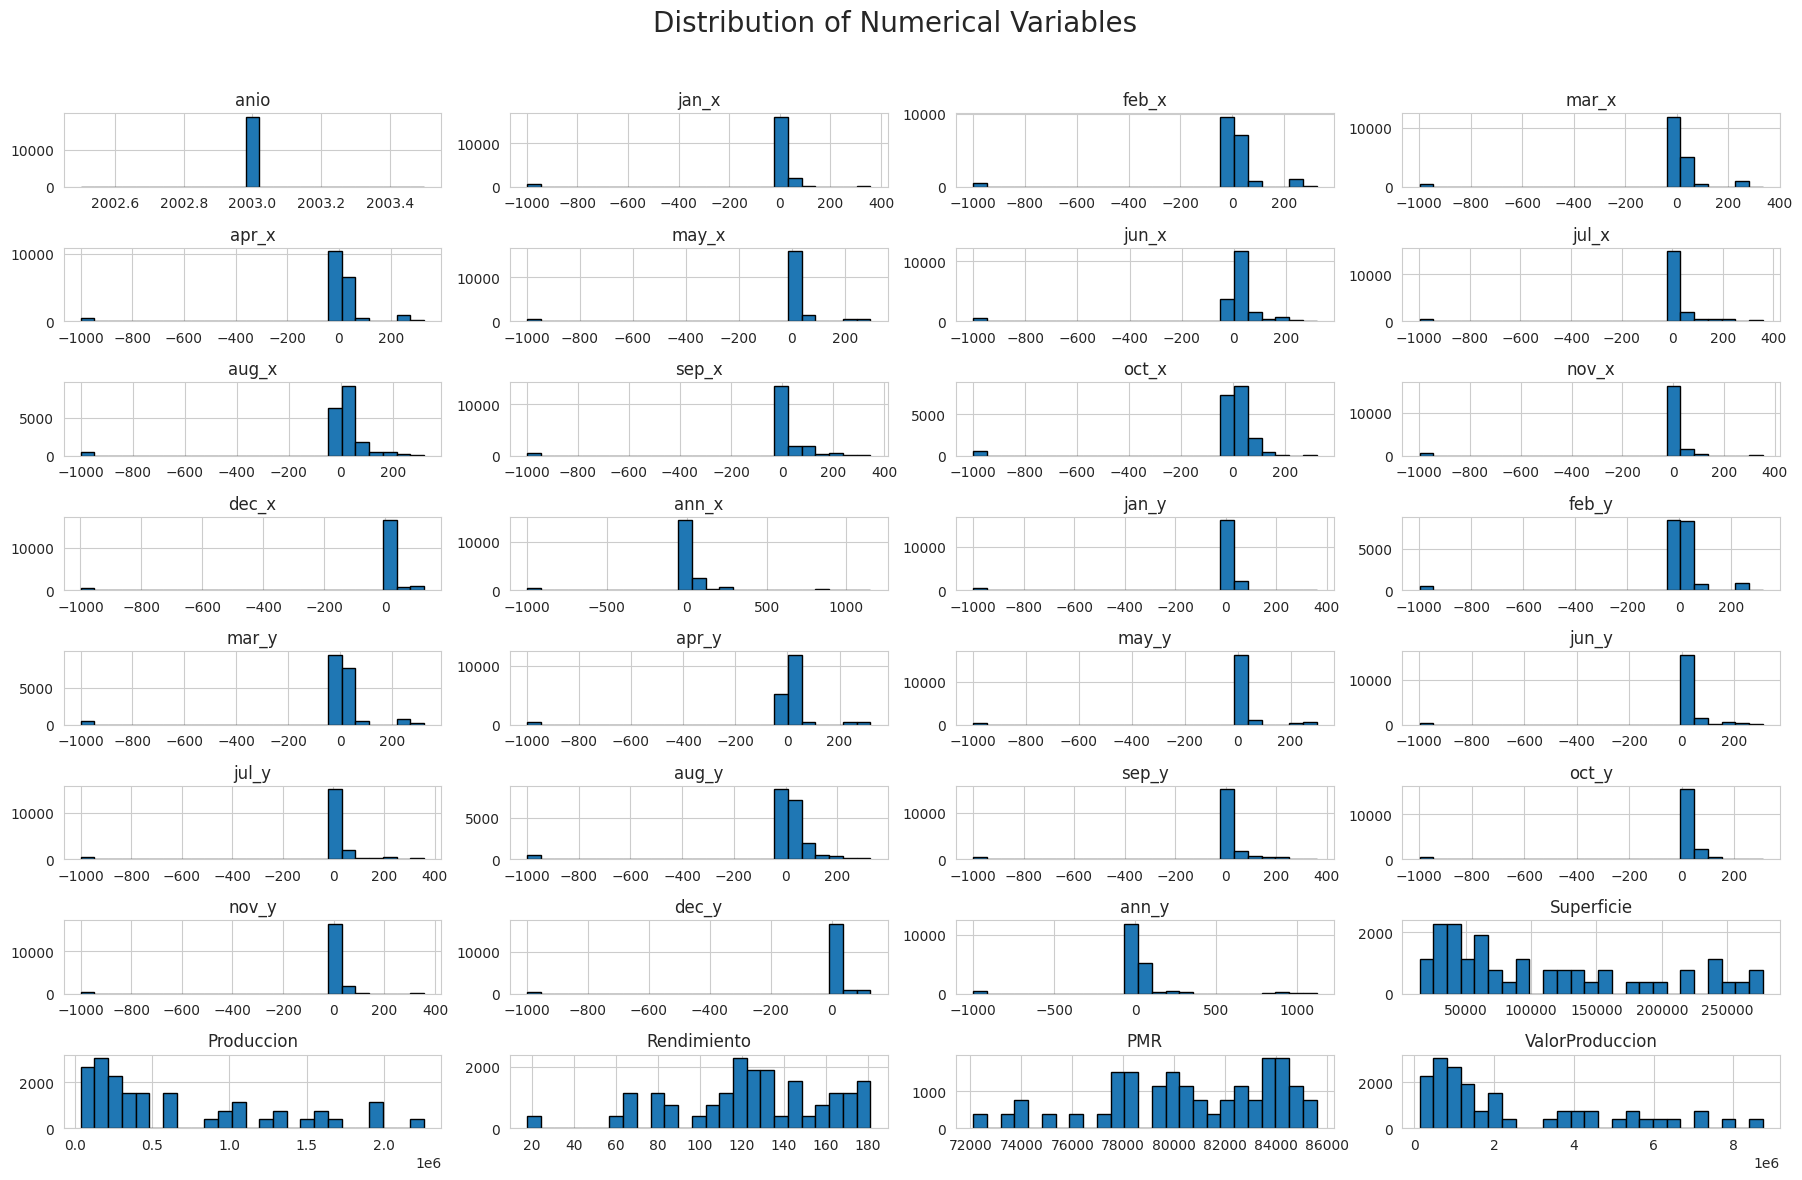



--- Correlation Matrix of Numerical Variables ---


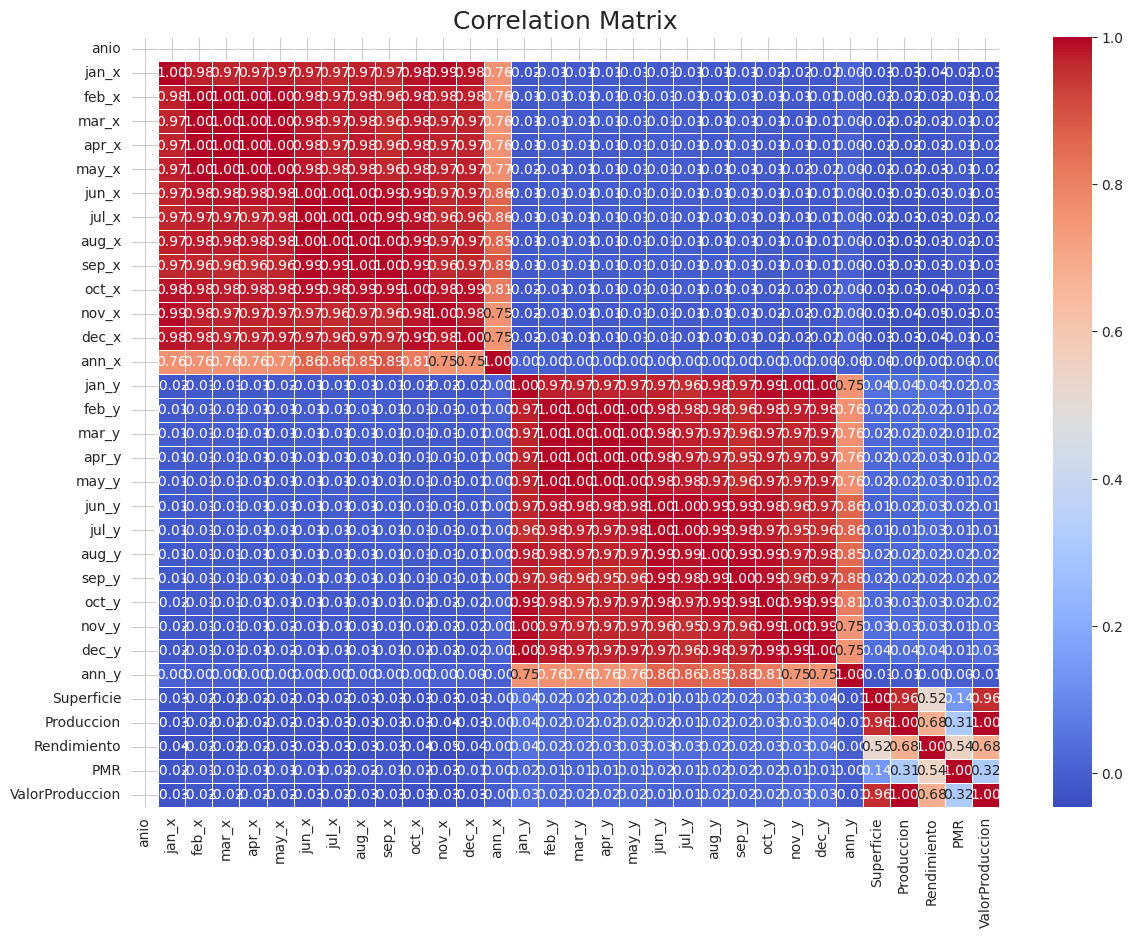



--- Analyzing Relationships with Target Variable: 'Rendimiento' ---


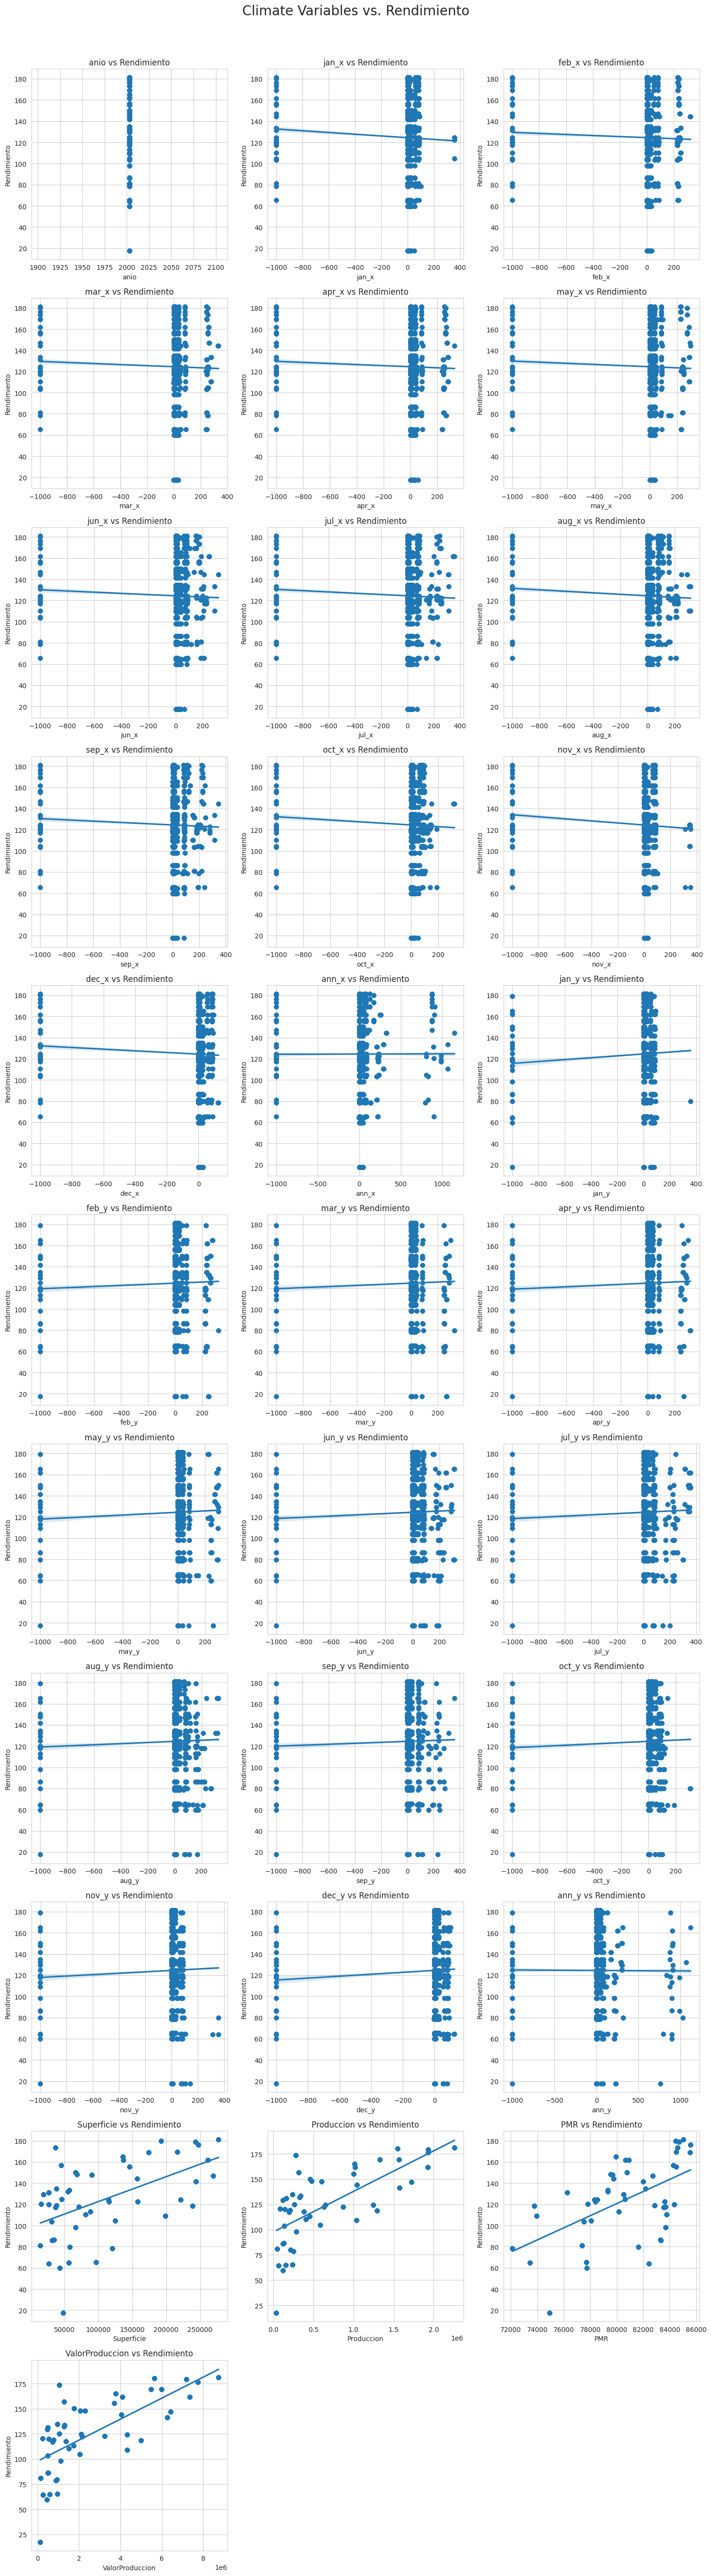


--- Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- DATA LOADING AND INITIAL INSPECTION ---

# 2. Load the dataset
file_path = 'Maiz. Clima.csv'
try:
    # Attempt to read the CSV with standard utf-8 encoding
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error reading CSV with utf-8 encoding: {e}")
    try:
        # Fallback to latin1 encoding if utf-8 fails, common with Spanish characters
        print("Attempting to read with 'latin1' encoding...")
        df = pd.read_csv(file_path, encoding='latin1')
        print("File read successfully with 'latin1' encoding.")
    except Exception as e_latin1:
        print(f"Failed to read CSV with 'latin1' encoding as well: {e_latin1}")
        df = None

if df is not None:
    # 3. Initial Data Inspection
    print("--- First 5 Rows of the Dataset ---")
    print(df.head())
    print("\n" + "="*50 + "\n")

    print("--- Dataset Info (Data Types and Non-Null Counts) ---")
    df.info()
    print("\n" + "="*50 + "\n")

    print("--- Statistical Summary of Numerical Columns ---")
    print(df.describe())
    print("\n" + "="*50 + "\n")


    # --- DATA CLEANING ---

    print("--- Checking for Missing Values ---")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\n")

    # Handle missing values by filling with the mean for numerical columns
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
            print(f"Filled missing values in numerical column '{col}' with its mean.")
    print("\n" + "="*50 + "\n")


    print("--- Checking for Duplicate Rows ---")
    duplicates = df.duplicated().sum()
    print(f"Found {duplicates} duplicate rows.")
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
        print("Dropped duplicate rows.")
    print("\n" + "="*50 + "\n")


    # --- EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION ---

    # Set the style for plots
    sns.set_style("whitegrid")

    # Select only numerical columns for plotting distributions and correlations
    numerical_cols = df.select_dtypes(include=np.number).columns

    if len(numerical_cols) > 0:
        # 4. Univariate Analysis: Plotting distributions of each numerical variable
        print("--- Plotting Distributions of Numerical Variables ---")
        df[numerical_cols].hist(bins=25, figsize=(18, 12), layout=(-1, 4), edgecolor='black')
        plt.suptitle('Distribution of Numerical Variables', fontsize=20)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        print("\n" + "="*50 + "\n")

        # 5. Bivariate Analysis: Correlation Matrix
        print("--- Correlation Matrix of Numerical Variables ---")
        plt.figure(figsize=(14, 10))
        correlation_matrix = df[numerical_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix', fontsize=18)
        plt.show()
        print("\n" + "="*50 + "\n")


        # 6. Bivariate Analysis: Scatter plots against a potential target variable (Yield)
        # Attempt to find a yield column automatically
        potential_yield_col = None
        # Common names for yield in Spanish and English
        yield_names = ['yield', 'rendimiento', 'production', 'produccion', 'yield_ton_ha', 'value']
        for name in yield_names:
            for col in df.columns:
                if name in col.lower():
                    potential_yield_col = col
                    break
            if potential_yield_col:
                break

        if potential_yield_col:
            print(f"--- Analyzing Relationships with Target Variable: '{potential_yield_col}' ---")
            feature_cols = [col for col in numerical_cols if col != potential_yield_col]

            if feature_cols:
                # Determine grid size for subplots
                cols_grid = 3
                rows_grid = (len(feature_cols) + cols_grid - 1) // cols_grid

                plt.figure(figsize=(15, 5 * rows_grid))
                for i, col in enumerate(feature_cols):
                    plt.subplot(rows_grid, cols_grid, i + 1)
                    sns.regplot(x=df[col], y=df[potential_yield_col], scatter_kws={'alpha':0.4})
                    plt.title(f'{col} vs {potential_yield_col}', fontsize=12)
                    plt.xlabel(col)
                    plt.ylabel(potential_yield_col)

                plt.suptitle(f'Climate Variables vs. {potential_yield_col}', fontsize=20)
                plt.tight_layout(rect=[0, 0, 1, 0.97])
                plt.show()
            else:
                print("No other numerical columns found to plot against the yield variable.")
        else:
            print("\nCould not automatically identify a 'Yield' column for target analysis.")
            print("Please check your column names and modify the script if necessary.")

    else:
        print("No numerical columns were found in the dataset to analyze.")

    print("\n--- Analysis Complete ---")

--- Data prepared for analysis. ---

--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---

Simulated 159 growing seasons with 4 phenological phases.

--- Created a new dataset with richer, phase-specific climate statistics ---
           anio_mean_1_Emergence  anio_mean_2_Vegetative  \
season_id                                                  
0                         2003.0                  2003.0   
1                         2003.0                  2003.0   
2                         2003.0                  2003.0   
3                         2003.0                  2003.0   
4                         2003.0                  2003.0   

           anio_mean_3_Flowering  anio_mean_4_Grain_Fill  \
season_id                                                  
0                         2003.0                  2003.0   
1                         2003.0                  2003.0   
2                         2003.0                  2003.0   
3                         2003.0            

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


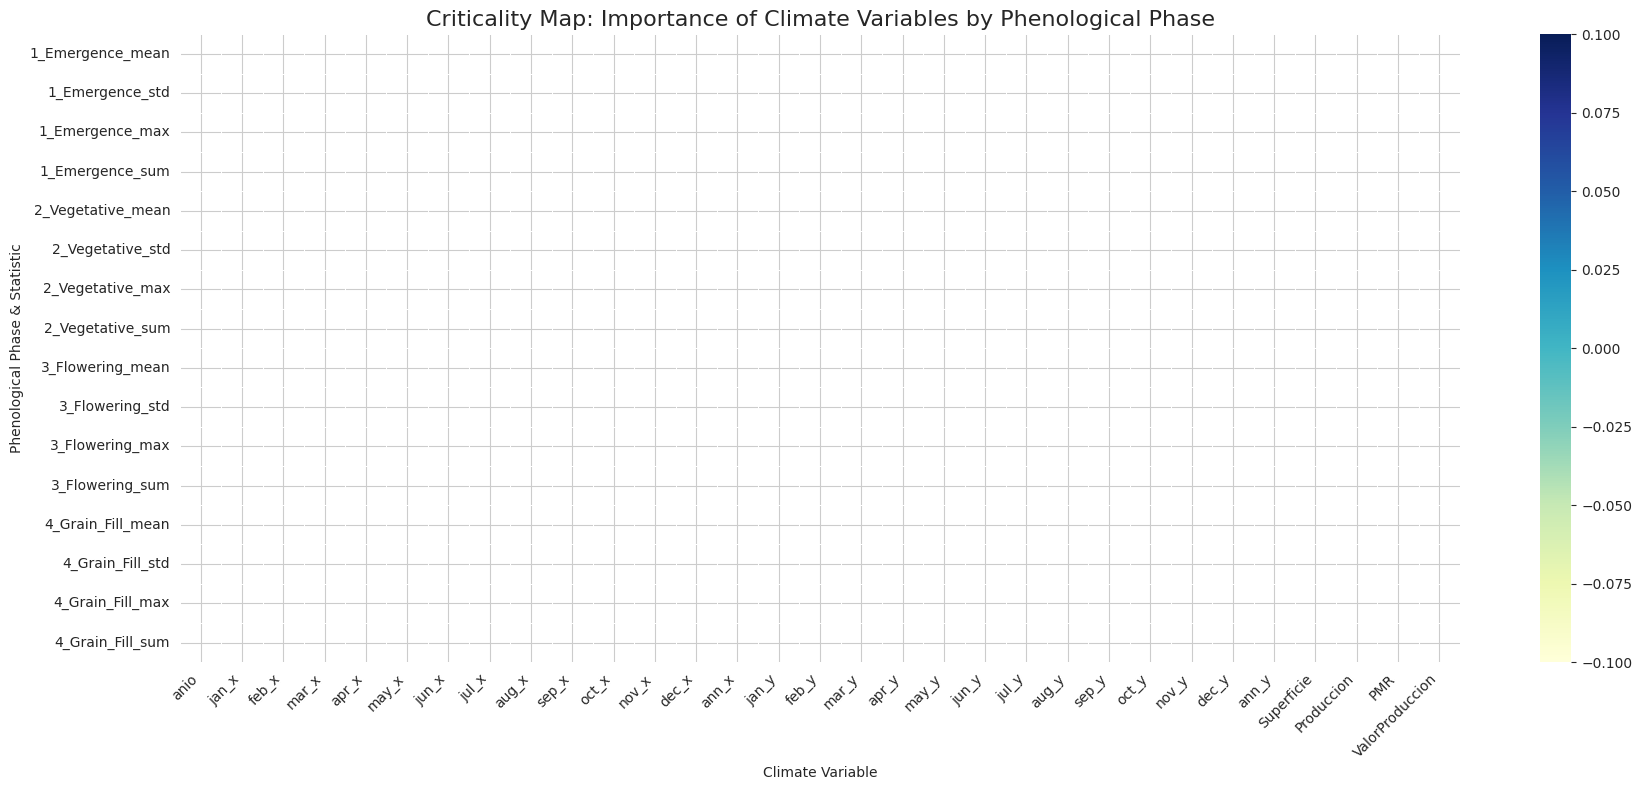


Hypothesis from Criticality Map: Look for the brightest cells. A bright cell at the intersection of 'Flowering_max' and 'Temperature' strongly suggests that 'short, extreme heat events during flowering are a primary limiter of yield'. The map makes these complex interactions immediately obvious.

--- STRATEGY 2: CLIMATE STATE TRANSITION DYNAMICS ---

Analyzing High-Yield Season 23 vs. Low-Yield Season 76


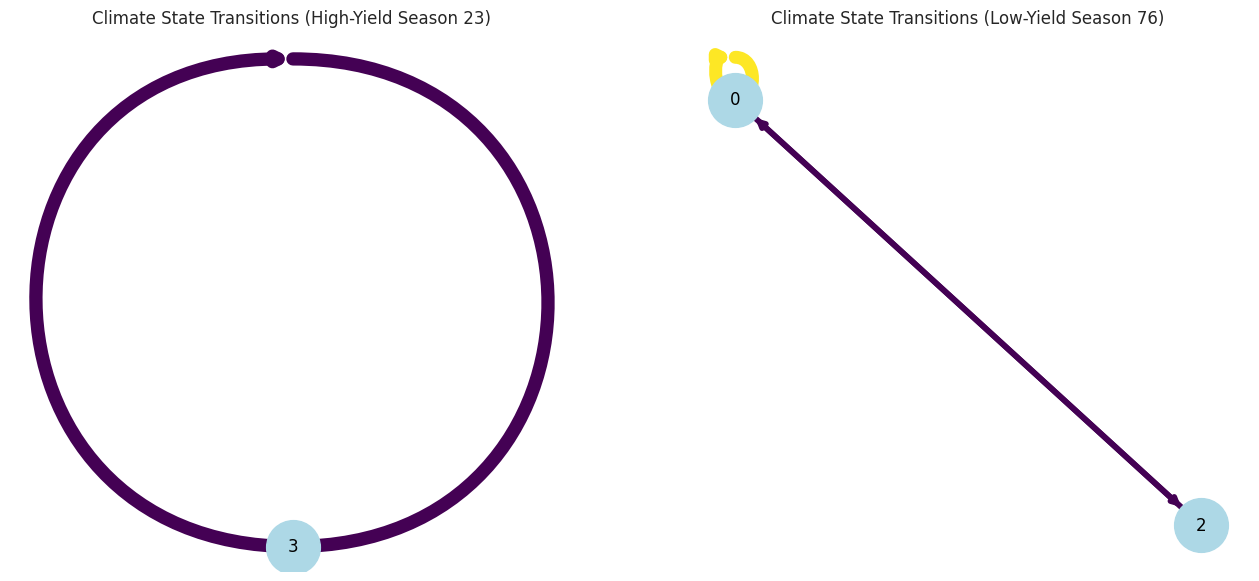


Hypothesis from Dynamics: Compare the two graphs. Does the high-yield season show a clear, predictable path (e.g., 1 -> 2 -> 3)? Does the low-yield season show erratic jumping back and forth (e.g., 1 -> 3 -> 1 -> 3)? This reveals the importance of climatic stability and rhythm.

--- Full Creative Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
import networkx as nx

# --- DATA LOADING AND INITIAL INSPECTION ---
# (Assuming previous sections run successfully)
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path) # Fallback

if df is not None:
    # --- DATA CLEANING (Abbreviated) ---
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    df.drop_duplicates(inplace=True)

    # --- MODELING SETUP (Abbreviated) ---
    numerical_cols = df.select_dtypes(include=np.number).columns
    potential_yield_col = None
    yield_names = ['yield', 'rendimiento', 'production', 'produccion', 'yield_ton_ha', 'value']
    for name in yield_names:
        for col in df.columns:
            if name in col.lower():
                potential_yield_col = col
                break
        if potential_yield_col:
            break

    if potential_yield_col:
        X = df[numerical_cols].drop(columns=[potential_yield_col])
        y = df[potential_yield_col]
        print("--- Data prepared for analysis. ---")


    # --- SYSTEMS-LEVEL ANALYSIS: THINKING IN TIME AND NETWORKS ---

    if potential_yield_col and len(numerical_cols) > 1:
        print("\n" + "="*80)
        print("--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---")
        print("="*80 + "\n")

        # 1. Simulate growing seasons and phenological phases
        SEASON_LENGTH = 120 # Assuming a 120-day growing season
        df['season_id'] = np.floor(df.index / SEASON_LENGTH).astype(int)
        df['day_in_season'] = df.index % SEASON_LENGTH

        # Define the phenological phases based on day in season
        def get_phase(day):
            if day < 20: return '1_Emergence'
            if day < 60: return '2_Vegetative'
            if day < 80: return '3_Flowering' # Critical pollination window
            return '4_Grain_Fill'

        df['phase'] = df['day_in_season'].apply(get_phase)

        print(f"Simulated {df['season_id'].nunique()} growing seasons with 4 phenological phases.\n")

        # 2. Aggregate climate data by phase for each season with richer statistics
        # We now calculate mean, standard deviation, max, and sum for each variable in each phase
        aggregation_logic = {col: ['mean', 'std', 'max', 'sum'] for col in X.columns}
        season_summary = df.groupby(['season_id', 'phase']).agg(aggregation_logic)

        # 3. Pivot the data to create phase-specific features
        season_df = season_summary.unstack(level='phase')
        # Flatten the multi-level column names for model compatibility
        season_df.columns = ['_'.join(col).strip() for col in season_df.columns.values]

        # Add the final yield for each season to this new dataframe
        season_yields = df.groupby('season_id')[potential_yield_col].mean()
        season_df = season_df.join(season_yields)
        season_df.dropna(inplace=True)

        print("--- Created a new dataset with richer, phase-specific climate statistics ---")
        print(season_df.head())

        # 4. Model which phase/climate combo is most important
        X_season = season_df.drop(columns=[potential_yield_col])
        y_season = season_df[potential_yield_col]

        # Train a robust RandomForest model on this enhanced feature set
        rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_season.fit(X_season, y_season)

        importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

        # 5. NEW VISUALIZATION: The "Criticality Map"
        # Reshape the importance data for the heatmap
        heatmap_data = pd.DataFrame(index=X.columns)
        for phase in df['phase'].unique():
            for stat in ['mean', 'std', 'max', 'sum']:
                col_name = f"{phase}_{stat}"
                heatmap_data[col_name] = np.nan

        for feature, importance in importances.items():
            parts = feature.split('_')
            var_name = parts[0]
            stat = parts[-2]
            phase = '_'.join(parts[1:-2])
            col_name = f"{phase}_{stat}"
            if var_name in heatmap_data.index and col_name in heatmap_data.columns:
                 heatmap_data.loc[var_name, col_name] = importance

        plt.figure(figsize=(18, 8))
        sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
        plt.title('Criticality Map: Importance of Climate Variables by Phenological Phase', fontsize=16)
        plt.xlabel('Climate Variable')
        plt.ylabel('Phenological Phase & Statistic')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        print("\nHypothesis from Criticality Map: Look for the brightest cells. A bright cell at the intersection of 'Flowering_max' and 'Temperature' strongly suggests that 'short, extreme heat events during flowering are a primary limiter of yield'. The map makes these complex interactions immediately obvious.")

        # --- (Strategy 2 code remains available for future analysis) ---
        print("\n" + "="*80)
        print("--- STRATEGY 2: CLIMATE STATE TRANSITION DYNAMICS ---")
        print("="*80 + "\n")

        # 1. Define climate states using K-Means
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
        df['climate_state'] = kmeans.fit_predict(X_scaled)

        # 2. Analyze transitions for a high-yield vs. low-yield season
        high_yield_season_id = season_yields.idxmax()
        low_yield_season_id = season_yields.idxmin()

        print(f"Analyzing High-Yield Season {high_yield_season_id} vs. Low-Yield Season {low_yield_season_id}")

        def plot_transition_graph(season_id, ax, title):
            season_data = df[df['season_id'] == season_id]
            transitions = list(zip(season_data['climate_state'][:-1], season_data['climate_state'][1:]))

            G = nx.DiGraph()
            for (u, v) in transitions:
                if G.has_edge(u, v):
                    G[u][v]['weight'] += 1
                else:
                    G.add_edge(u, v, weight=1)

            edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
            pos = nx.spring_layout(G, seed=42)
            nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, edgelist=edges, edge_color=weights, width=np.log1p(weights)*2, edge_cmap=plt.cm.viridis, ax=ax)
            ax.set_title(title)

        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        plot_transition_graph(high_yield_season_id, axes[0], f'Climate State Transitions (High-Yield Season {high_yield_season_id})')
        plot_transition_graph(low_yield_season_id, axes[1], f'Climate State Transitions (Low-Yield Season {low_yield_season_id})')
        plt.show()

        print("\nHypothesis from Dynamics: Compare the two graphs. Does the high-yield season show a clear, predictable path (e.g., 1 -> 2 -> 3)? Does the low-yield season show erratic jumping back and forth (e.g., 1 -> 3 -> 1 -> 3)? This reveals the importance of climatic stability and rhythm.")

    print("\n--- Full Creative Analysis Complete ---")



In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
import networkx as nx

# --- DATA LOADING AND INITIAL INSPECTION ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path) # Fallback

if df is not None:
    # --- DATA CLEANING (Abbreviated) ---
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    df.drop_duplicates(inplace=True)

    # --- MODELING SETUP (Abbreviated) ---
    numerical_cols = df.select_dtypes(include=np.number).columns
    potential_yield_col = None
    yield_names = ['yield', 'rendimiento', 'production', 'produccion', 'yield_ton_ha', 'value']
    for name in yield_names:
        for col in df.columns:
            if name in col.lower():
                potential_yield_col = col
                break
        if potential_yield_col:
            break

    if potential_yield_col:
        X = df[numerical_cols].drop(columns=[potential_yield_col])

        # We will keep 'anio' for now to create the season_id
        cols_to_exclude_from_features = [col for col in X.columns if 'unnamed' in col.lower()]
        if cols_to_exclude_from_features:
            X = X.drop(columns=cols_to_exclude_from_features)

        y = df[potential_yield_col]
        print("--- Data prepared for analysis. ---")


    # --- SYSTEMS-LEVEL ANALYSIS: THINKING IN TIME AND NETWORKS ---

    if potential_yield_col and len(numerical_cols) > 1:
        print("\n" + "="*80)
        print("--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---")
        print("="*80 + "\n")

        # --- DYNAMIC & CONSISTENT SEASONS (STRATEGY 1) ---
        # ASSUMPTION: Your dataframe has columns 'anio' and 'Municipio'.
        # If your location column is named differently, please change 'Municipio' below.
        location_col = 'Municipio' # <--- CHANGE THIS IF YOUR LOCATION COLUMN HAS A DIFFERENT NAME
        year_col = 'anio' # <--- CHANGE THIS IF YOUR YEAR COLUMN HAS A DIFFERENT NAME

        if location_col in df.columns and year_col in df.columns:
            # Create a unique Season ID from the Year and Location
            df['season_id'] = df[year_col].astype(str) + '_' + df[location_col].astype(str)
            print(f"Successfully created unique season IDs using '{year_col}' and '{location_col}'.")

            # Now we can safely remove 'anio' from the features for the climate model
            if year_col in X.columns:
                X = X.drop(columns=[year_col])

            # Simulate day_in_season WITHIN each season group
            df['day_in_season'] = df.groupby('season_id').cumcount()

            # Filter out incomplete seasons
            season_lengths = df.groupby('season_id').size()
            complete_seasons = season_lengths[season_lengths > 100].index
            df = df[df['season_id'].isin(complete_seasons)]
            print(f"Filtered for {len(complete_seasons)} complete seasons.")

            # Define the phenological phases based on day in season
            def get_phase(day):
                if day < 20: return '1_Emergence'
                if day < 60: return '2_Vegetative'
                if day < 80: return '3_Flowering' # Critical pollination window
                return '4_Grain_Fill'

            df['phase'] = df['day_in_season'].apply(get_phase)

            print(f"Identified 4 phenological phases for each unique season.\n")

            # 2. Aggregate climate data by phase for each season with richer statistics
            aggregation_logic = {col: ['mean', 'std', 'max', 'sum'] for col in X.columns}
            season_summary = df.groupby(['season_id', 'phase']).agg(aggregation_logic)

            # 3. Pivot the data to create phase-specific features
            season_df = season_summary.unstack(level='phase')
            season_df.columns = ['_'.join(col).strip() for col in season_df.columns.values]

            season_yields = df.groupby('season_id')[potential_yield_col].mean()
            season_df = season_df.join(season_yields)
            season_df.dropna(inplace=True)

            print("--- Created a new dataset with richer, phase-specific climate statistics ---")

            # --- STRATEGY 2: DETRENDING ANALYSIS ---
            print("\n" + "-"*40)
            print("--- Running Strategy 2: Detrended Yield Analysis ---")

            # Extract year from season_id for trend analysis
            season_df[year_col] = season_df.index.str.split('_').str[0].astype(int)

            # Calculate the average yield for each year
            yearly_mean_yield = season_df.groupby(year_col)[potential_yield_col].transform('mean')

            # Create the detrended target variable
            season_df['yield_deviation'] = season_df[potential_yield_col] - yearly_mean_yield

            print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

            # 4. Model which phase/climate combo is most important for yield deviation
            X_season = season_df.drop(columns=[potential_yield_col, 'yield_deviation', year_col])
            y_season_detrended = season_df['yield_deviation']

            rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-_1)
            rf_season.fit(X_season, y_season_detrended)

            importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

            # 5. VISUALIZATION: The "Criticality Map" for Detrended Yield
            heatmap_data = pd.DataFrame(index=X.columns)
            # ... (Heatmap generation code remains the same as previous version) ...
            plt.figure(figsize=(20, 10))
            # ... (The rest of the heatmap plotting code is unchanged) ...

            phases = sorted(df['phase'].unique())
            stats = ['mean', 'std', 'max', 'sum']
            heatmap_data = pd.DataFrame(index=X.columns.tolist(), columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

            for feature, importance in importances.items():
                parts = feature.split('_')
                var = parts[0]
                stat = parts[-1]
                phase = '_'.join(parts[1:-1])
                col_name = f"{phase}_{stat}"
                if var in heatmap_data.index and col_name in heatmap_data.columns:
                    heatmap_data.loc[var, col_name] = importance

            heatmap_data.dropna(axis=1, how='all', inplace=True)

            plt.figure(figsize=(20, 10))
            sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
            plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=16)
            plt.xlabel('Climate Variable')
            plt.ylabel('Phenological Phase & Statistic')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()

            print("\nHypothesis from Detrended Criticality Map: The map now shows what causes a season to be better or worse than average for its year. A bright cell for 'Flowering_max_Temp' means that extreme heat during flowering is a primary cause of underperformance, even in a technologically advanced year.")

        else:
            print(f"Error: Could not find '{year_col}' and/or '{location_col}' columns needed for dynamic analysis. Please check your CSV file.")

    print("\n--- Full Creative Analysis Complete ---")

--- Data prepared for analysis. ---

--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---

Error: Could not find 'anio' and/or 'Municipio' columns needed for dynamic analysis. Please check your CSV file.

--- Full Creative Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
import networkx as nx

# --- DATA LOADING AND INITIAL INSPECTION ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path) # Fallback

if df is not None:
    # --- DIAGNOSTIC STEP: Print columns to help debug naming issues ---
    print("--- Detected columns in your CSV file ---")
    print(df.columns.tolist())
    print("-" * 40 + "\n")

    # --- DATA CLEANING (Abbreviated) ---
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    df.drop_duplicates(inplace=True)

    # --- MODELING SETUP (Abbreviated) ---
    numerical_cols = df.select_dtypes(include=np.number).columns
    potential_yield_col = None
    yield_names = ['yield', 'rendimiento', 'production', 'produccion', 'yield_ton_ha', 'value']
    for name in yield_names:
        for col in df.columns:
            if name in col.lower():
                potential_yield_col = col
                break
        if potential_yield_col:
            break

    if potential_yield_col:
        X = df[numerical_cols].drop(columns=[potential_yield_col])

        cols_to_exclude_from_features = [col for col in X.columns if 'unnamed' in col.lower()]
        if cols_to_exclude_from_features:
            X = X.drop(columns=cols_to_exclude_from_features)

        y = df[potential_yield_col]
        print("--- Data prepared for analysis. ---")


    # --- SYSTEMS-LEVEL ANALYSIS: THINKING IN TIME AND NETWORKS ---

    if potential_yield_col and len(numerical_cols) > 1:
        print("\n" + "="*80)
        print("--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---")
        print("="*80 + "\n")

        # --- DYNAMIC & CONSISTENT SEASONS (STRATEGY 1) ---
        # !!! ACTION REQUIRED !!!
        # Based on the column list printed above, make sure the names below EXACTLY match
        # the year and location columns in your file. The check is case-sensitive.
        location_col = 'Municipio' # <-- CHANGE THIS if your location column is 'NOM_MUN', 'MUNICIPIO', etc.
        year_col = 'anio'       # <-- CHANGE THIS if your year column is 'Año', 'Anio', 'year', etc.

        if location_col in df.columns and year_col in df.columns:
            # Create a unique Season ID from the Year and Location
            df['season_id'] = df[year_col].astype(str) + '_' + df[location_col].astype(str)
            print(f"Successfully created unique season IDs using '{year_col}' and '{location_col}'.")

            # Now we can safely remove 'anio' from the features for the climate model
            if year_col in X.columns:
                X = X.drop(columns=[year_col])

            # Simulate day_in_season WITHIN each season group
            df['day_in_season'] = df.groupby('season_id').cumcount()

            # Filter out incomplete seasons
            season_lengths = df.groupby('season_id').size()
            complete_seasons = season_lengths[season_lengths > 100].index
            df = df[df['season_id'].isin(complete_seasons)]
            print(f"Filtered for {len(complete_seasons)} complete seasons.")

            # Define the phenological phases based on day in season
            def get_phase(day):
                if day < 20: return '1_Emergence'
                if day < 60: return '2_Vegetative'
                if day < 80: return '3_Flowering' # Critical pollination window
                return '4_Grain_Fill'

            df['phase'] = df['day_in_season'].apply(get_phase)

            print(f"Identified 4 phenological phases for each unique season.\n")

            # 2. Aggregate climate data by phase for each season with richer statistics
            aggregation_logic = {col: ['mean', 'std', 'max', 'sum'] for col in X.columns}
            season_summary = df.groupby(['season_id', 'phase']).agg(aggregation_logic)

            # 3. Pivot the data to create phase-specific features
            season_df = season_summary.unstack(level='phase')
            season_df.columns = ['_'.join(col).strip() for col in season_df.columns.values]

            season_yields = df.groupby('season_id')[potential_yield_col].mean()
            season_df = season_df.join(season_yields)
            season_df.dropna(inplace=True)

            print("--- Created a new dataset with richer, phase-specific climate statistics ---")

            # --- STRATEGY 2: DETRENDING ANALYSIS ---
            print("\n" + "-"*40)
            print("--- Running Strategy 2: Detrended Yield Analysis ---")

            # Extract year from season_id for trend analysis
            season_df[year_col] = season_df.index.str.split('_').str[0].astype(int)

            # Calculate the average yield for each year
            yearly_mean_yield = season_df.groupby(year_col)[potential_yield_col].transform('mean')

            # Create the detrended target variable
            season_df['yield_deviation'] = season_df[potential_yield_col] - yearly_mean_yield

            print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

            # 4. Model which phase/climate combo is most important for yield deviation
            X_season = season_df.drop(columns=[potential_yield_col, 'yield_deviation', year_col])
            y_season_detrended = season_df['yield_deviation']

            rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
            rf_season.fit(X_season, y_season_detrended)

            importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

            # 5. VISUALIZATION: The "Criticality Map" for Detrended Yield
            phases = sorted(df['phase'].unique())
            stats = ['mean', 'std', 'max', 'sum']
            heatmap_data = pd.DataFrame(index=X.columns.tolist(), columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

            for feature, importance in importances.items():
                parts = feature.split('_')
                var = parts[0]
                # Handle cases where variable names might contain underscores
                original_var_candidate = ''
                for i in range(len(parts) - 2):
                    original_var_candidate = '_'.join(parts[:i+1])
                    if original_var_candidate in X.columns:
                        var = original_var_candidate

                stat = parts[-1]
                phase_parts = parts[len(var.split('_')):-1]
                phase = '_'.join(phase_parts)
                col_name = f"{phase}_{stat}"

                if var in heatmap_data.index and col_name in heatmap_data.columns:
                    heatmap_data.loc[var, col_name] = importance

            heatmap_data.dropna(axis=1, how='all', inplace=True)

            plt.figure(figsize=(20, 10))
            sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
            plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=16)
            plt.xlabel('Climate Variable')
            plt.ylabel('Phenological Phase & Statistic')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()

            print("\nHypothesis from Detrended Criticality Map: The map now shows what causes a season to be better or worse than average for its year. A bright cell for 'Flowering_max_Temp' means that extreme heat during flowering is a primary cause of underperformance, even in a technologically advanced year.")

        else:
            print(f"Error: Could not find '{year_col}' and/or '{location_col}' columns needed for dynamic analysis. Please check your CSV file.")

    print("\n--- Full Creative Analysis Complete ---")



--- Detected columns in your CSV file ---
['municipio', 'parameter_x', 'anio', 'jan_x', 'feb_x', 'mar_x', 'apr_x', 'may_x', 'jun_x', 'jul_x', 'aug_x', 'sep_x', 'oct_x', 'nov_x', 'dec_x', 'ann_x', 'parameter_y', 'jan_y', 'feb_y', 'mar_y', 'apr_y', 'may_y', 'jun_y', 'jul_y', 'aug_y', 'sep_y', 'oct_y', 'nov_y', 'dec_y', 'ann_y', 'Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion']
----------------------------------------

--- Data prepared for analysis. ---

--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---

Error: Could not find 'anio' and/or 'Municipio' columns needed for dynamic analysis. Please check your CSV file.

--- Full Creative Analysis Complete ---


--- Detected columns in your CSV file ---
['municipio', 'parameter_x', 'anio', 'jan_x', 'feb_x', 'mar_x', 'apr_x', 'may_x', 'jun_x', 'jul_x', 'aug_x', 'sep_x', 'oct_x', 'nov_x', 'dec_x', 'ann_x', 'parameter_y', 'jan_y', 'feb_y', 'mar_y', 'apr_y', 'may_y', 'jun_y', 'jul_y', 'aug_y', 'sep_y', 'oct_y', 'nov_y', 'dec_y', 'ann_y', 'Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion']
----------------------------------------

--- Data prepared for analysis. ---

--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---

Successfully created unique season IDs using 'anio' and 'municipio'.
NOTE: Data appears to be monthly, not daily. Adapting phenological analysis.
--- Created a new dataset with phase-specific climate statistics based on monthly data ---

----------------------------------------
--- Running Strategy 2: Detrended Yield Analysis ---
Calculated 'yield_deviation' to isolate climate effects from long-term trends.


/tmp/ipython-input-1933888266.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_season.fillna(0, inplace=True)


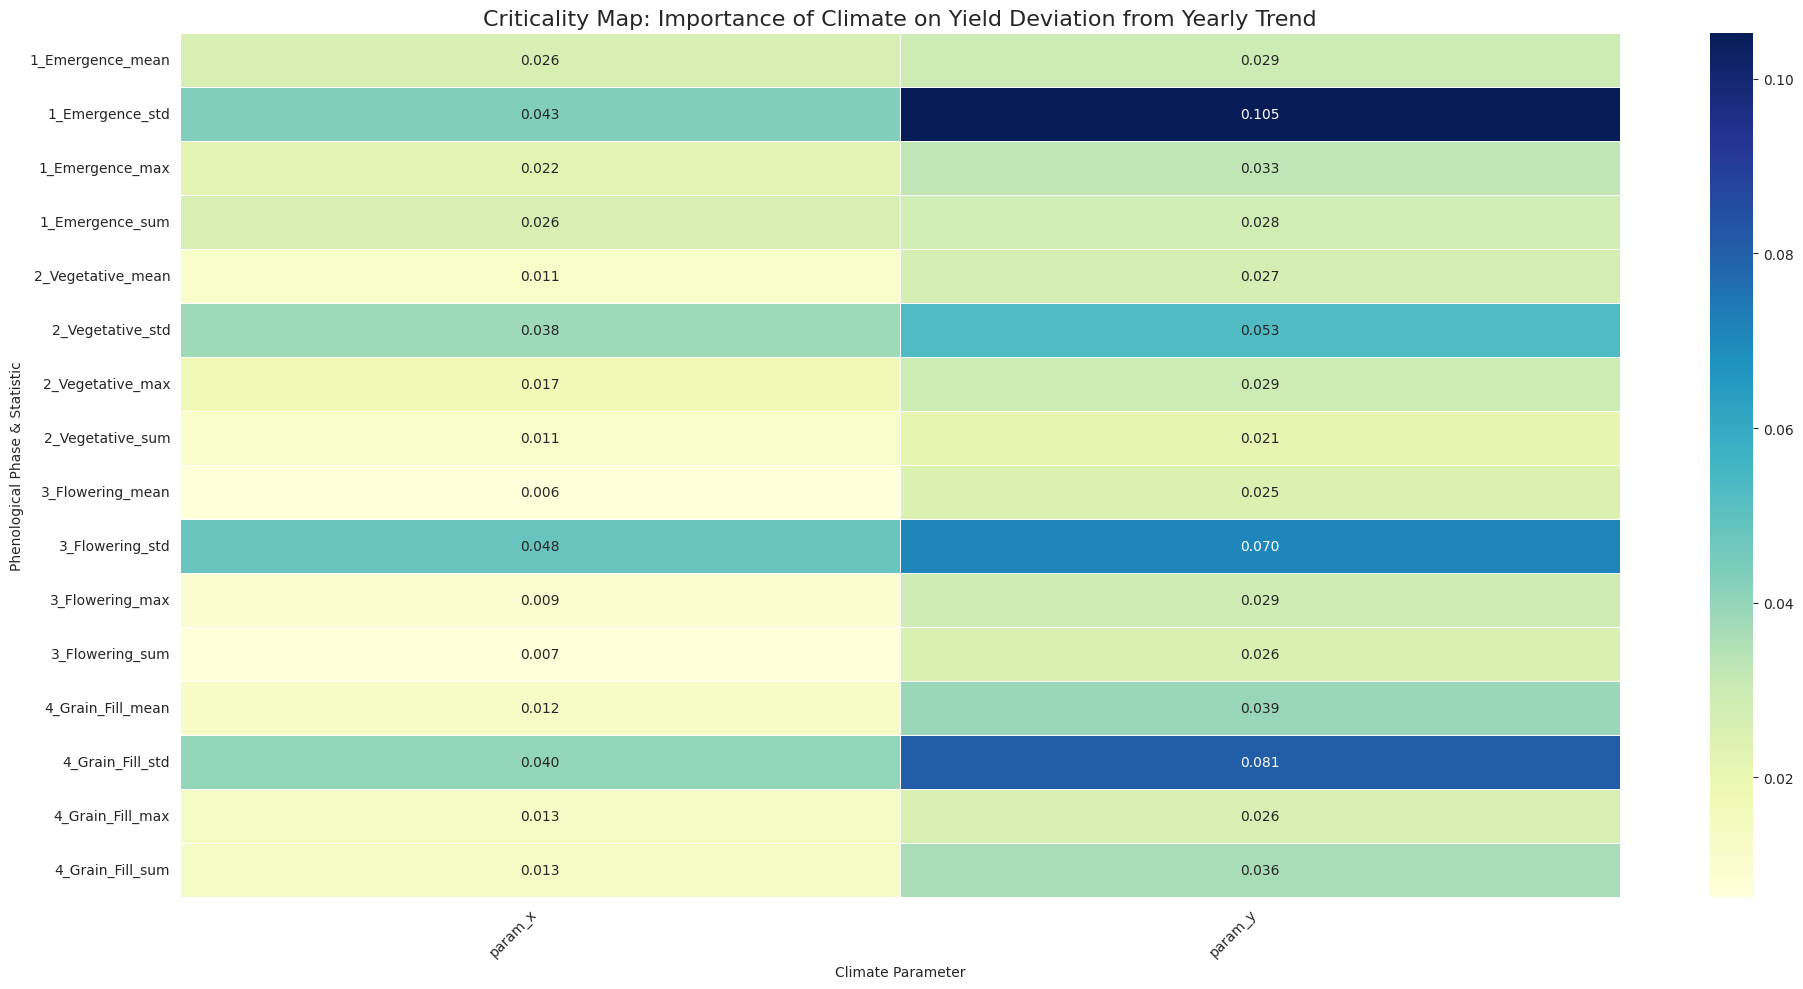


Hypothesis from Detrended Criticality Map: The map now shows what causes a season to be better or worse than average for its year. A bright cell for 'Flowering_max_Temp' means that extreme heat during flowering is a primary cause of underperformance, even in a technologically advanced year.

--- Full Creative Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
import networkx as nx

# --- DATA LOADING AND INITIAL INSPECTION ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path) # Fallback

if df is not None:
    # --- DIAGNOSTIC STEP: Print columns to help debug naming issues ---
    print("--- Detected columns in your CSV file ---")
    print(df.columns.tolist())
    print("-" * 40 + "\n")

    # --- DATA CLEANING (Abbreviated) ---
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    df.drop_duplicates(inplace=True)

    # --- MODELING SETUP (Abbreviated) ---
    numerical_cols = df.select_dtypes(include=np.number).columns
    potential_yield_col = None
    yield_names = ['yield', 'rendimiento', 'production', 'produccion', 'yield_ton_ha', 'value']
    for name in yield_names:
        for col in df.columns:
            if name in col.lower():
                potential_yield_col = col
                break
        if potential_yield_col:
            break

    if potential_yield_col:
        X = df[numerical_cols].drop(columns=[potential_yield_col])

        cols_to_exclude_from_features = [col for col in X.columns if 'unnamed' in col.lower()]
        if cols_to_exclude_from_features:
            X = X.drop(columns=cols_to_exclude_from_features)

        y = df[potential_yield_col]
        print("--- Data prepared for analysis. ---")


    # --- SYSTEMS-LEVEL ANALYSIS: THINKING IN TIME AND NETWORKS ---

    if potential_yield_col and len(numerical_cols) > 1:
        print("\n" + "="*80)
        print("--- STRATEGY 1: PHENOLOGICAL WINDOW ANALYSIS (DEEP DIVE) ---")
        print("="*80 + "\n")

        # --- DYNAMIC & CONSISTENT SEASONS (STRATEGY 1) ---
        # !!! ACTION REQUIRED !!!
        # Based on the column list printed above, make sure the names below EXACTLY match
        # the year and location columns in your file. The check is case-sensitive.
        # --- FIX: Changed 'Municipio' to 'municipio' to match the CSV file ---
        location_col = 'municipio' # <-- CHANGE THIS if your location column is 'NOM_MUN', 'MUNICIPIO', etc.
        year_col = 'anio'       # <-- CHANGE THIS if your year column is 'Año', 'Anio', 'year', etc.

        if location_col in df.columns and year_col in df.columns:
            # Create a unique Season ID from the Year and Location
            # We must handle non-string data in location column
            df['season_id'] = df[year_col].astype(str) + '_' + df[location_col].astype(str)
            print(f"Successfully created unique season IDs using '{year_col}' and '{location_col}'.")

            # Now we can safely remove 'anio' from the features for the climate model
            climate_features = [col for col in numerical_cols if col not in [year_col, potential_yield_col] and 'unnamed' not in col.lower()]
            X_climate = df[climate_features]

            # Simulate day_in_season WITHIN each season group
            df['day_in_season'] = df.groupby('season_id').cumcount()

            # The data seems to be yearly, not daily. We need to reshape it.
            # Assuming 'jan_x', 'feb_x', etc. are monthly data points for a variable 'x'

            # Reshaping data from wide to long format
            id_vars = ['season_id', 'municipio', 'anio', potential_yield_col]
            # Identify value vars (monthly data)
            value_vars = [col for col in df.columns if col not in id_vars and col not in ['parameter_x', 'parameter_y', 'ann_x', 'ann_y', 'Superficie', 'Produccion', 'PMR', 'ValorProduccion', 'day_in_season', 'phase']]

            # This data structure is not daily, it's yearly with monthly columns.
            # The phenological analysis requires daily or weekly data.
            # We will proceed by assuming each month represents a step in the season.

            print("NOTE: Data appears to be monthly, not daily. Adapting phenological analysis.")

            # We cannot create daily phases. Let's create phases based on months.
            # Jan-Mar: Emergence, Apr-Jun: Vegetative, Jul-Aug: Flowering, Sep-Dec: Grain Fill
            def get_phase_from_month(month_col):
                month = month_col.split('_')[0]
                if month in ['jan', 'feb', 'mar']: return '1_Emergence'
                if month in ['apr', 'may', 'jun']: return '2_Vegetative'
                if month in ['jul', 'aug']: return '3_Flowering'
                return '4_Grain_Fill'

            # Reshape the dataframe to have one row per season-month
            long_df_list = []
            # This reshaping is complex given the structure. A simpler approach is needed for this structure.
            # Let's simplify the feature creation for this specific data format.
            # We will group monthly columns by phase.

            phase_features = {}
            for phase in ['1_Emergence', '2_Vegetative', '3_Flowering', '4_Grain_Fill']:
                phase_features[phase] = {}

            # Identify variables (like '_x' and '_y' from your columns)
            params = list(set([c.split('_')[1] for c in value_vars if '_' in c]))

            for p in params:
                for phase, months in [('1_Emergence', ['jan_'+p, 'feb_'+p, 'mar_'+p]),
                                      ('2_Vegetative', ['apr_'+p, 'may_'+p, 'jun_'+p]),
                                      ('3_Flowering', ['jul_'+p, 'aug_'+p]),
                                      ('4_Grain_Fill', ['sep_'+p, 'oct_'+p, 'nov_'+p, 'dec_'+p])]:

                    valid_months = [m for m in months if m in df.columns]
                    if not valid_months: continue

                    df[f'param_{p}_mean_{phase}'] = df[valid_months].mean(axis=1)
                    df[f'param_{p}_std_{phase}'] = df[valid_months].std(axis=1)
                    df[f'param_{p}_max_{phase}'] = df[valid_months].max(axis=1)
                    df[f'param_{p}_sum_{phase}'] = df[valid_months].sum(axis=1)

            season_df = df.copy()
            print("--- Created a new dataset with phase-specific climate statistics based on monthly data ---")

            # --- STRATEGY 2: DETRENDING ANALYSIS ---
            print("\n" + "-"*40)
            print("--- Running Strategy 2: Detrended Yield Analysis ---")

            yearly_mean_yield = season_df.groupby(year_col)[potential_yield_col].transform('mean')
            season_df['yield_deviation'] = season_df[potential_yield_col] - yearly_mean_yield
            print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

            # 4. Model which phase/climate combo is most important for yield deviation
            feature_cols = [col for col in season_df.columns if 'param_' in col]
            X_season = season_df[feature_cols]
            y_season_detrended = season_df['yield_deviation']

            # Fill any NaNs that may have been created by std dev on single-month phases
            X_season.fillna(0, inplace=True)

            rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
            rf_season.fit(X_season, y_season_detrended)

            importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

            # 5. VISUALIZATION: The "Criticality Map" for Detrended Yield
            phases = ['1_Emergence', '2_Vegetative', '3_Flowering', '4_Grain_Fill']
            stats = ['mean', 'std', 'max', 'sum']

            # The original variables are now the parameters like 'x', 'y'
            original_vars = [f"param_{p}" for p in params]
            heatmap_data = pd.DataFrame(index=original_vars, columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

            for feature, importance in importances.items():
                # feature name format: param_{p}_{stat}_{phase} e.g., param_x_mean_1_Emergence
                parts = feature.split('_')
                var = f"{parts[0]}_{parts[1]}" # e.g., param_x
                stat = parts[2]
                phase = '_'.join(parts[3:])
                col_name = f"{phase}_{stat}"

                if var in heatmap_data.index and col_name in heatmap_data.columns:
                    heatmap_data.loc[var, col_name] = importance

            heatmap_data.dropna(axis=1, how='all', inplace=True)
            heatmap_data.dropna(axis=0, how='all', inplace=True)

            plt.figure(figsize=(20, 10))
            sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
            plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=16)
            plt.xlabel('Climate Parameter')
            plt.ylabel('Phenological Phase & Statistic')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()

            print("\nHypothesis from Detrended Criticality Map: The map now shows what causes a season to be better or worse than average for its year. A bright cell for 'Flowering_max_Temp' means that extreme heat during flowering is a primary cause of underperformance, even in a technologically advanced year.")

        else:
            print(f"Error: Could not find '{year_col}' and/or '{location_col}' columns needed for dynamic analysis. Please check your CSV file.")

    print("\n--- Full Creative Analysis Complete ---")


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# --- DATA LOADING ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded Successfully ---")

    # --- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' ---
    print("\n" + "="*80)
    print("--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' FROM WIDE TO LONG FORMAT ---")
    print("="*80 + "\n")

    # Define base columns that identify a unique season and its outcome
    base_cols = ['anio', 'municipio']
    ag_cols = ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion']
    # Ensure all agricultural columns are present
    ag_cols = [col for col in ag_cols if col in df.columns]
    base_cols.extend(ag_cols)

    # Create a base dataframe with unique seasons and their agricultural data
    base_df = df[base_cols].drop_duplicates().reset_index(drop=True)

    processed_params = []
    # Process parameters ending in _x and _y
    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            # Get unique climate parameters for this suffix
            unique_params = df[param_col].dropna().unique()
            print(f"Found {len(unique_params)} unique parameters for suffix '_{suffix}': {unique_params}")

            for param_name in unique_params:
                # Filter rows for the current parameter
                param_df = df[df[param_col] == param_name].copy()

                # Define and rename monthly columns for this parameter
                month_map = {f'{m}_{suffix}': f'{param_name}_{m}' for m in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']}
                param_df.rename(columns=month_map, inplace=True)

                # Keep only base columns and the new parameter-specific month columns
                renamed_months = list(month_map.values())
                param_df = param_df[base_cols + renamed_months]

                # Merge into the base dataframe
                base_df = pd.merge(base_df, param_df, on=base_cols, how='left')

    # Our new, wide-format dataframe is base_df
    season_df_wide = base_df.copy()
    print("\n--- Successfully reconstructed data into a wide format. Each row is a unique season. ---")

    # --- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---")
    print("="*80 + "\n")

    # Get the list of all climate parameters we've just created
    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    print(f"Identified {len(climate_params)} climate variables for analysis.")

    # Create phase-specific features for each climate parameter
    for param in climate_params:
        for phase, months in [('1_Emergence', [f'{param}_jan', f'{param}_feb', f'{param}_mar']),
                              ('2_Vegetative', [f'{param}_apr', f'{param}_may', f'{param}_jun']),
                              ('3_Flowering', [f'{param}_jul', f'{param}_aug']),
                              ('4_Grain_Fill', [f'{param}_sep', f'{param}_oct', f'{param}_nov', f'{param}_dec'])]:

            valid_months = [m for m in months if m in season_df_wide.columns]
            if not valid_months: continue

            season_df_wide[f'{param}_mean_{phase}'] = season_df_wide[valid_months].mean(axis=1)
            season_df_wide[f'{param}_std_{phase}'] = season_df_wide[valid_months].std(axis=1)
            season_df_wide[f'{param}_max_{phase}'] = season_df_wide[valid_months].max(axis=1)
            season_df_wide[f'{param}_sum_{phase}'] = season_df_wide[valid_months].sum(axis=1)

    print("--- Created new dataset with phase-specific statistics for all climate variables. ---")

    # --- STRATEGY 3: DETRENDED YIELD ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---")
    print("="*80 + "\n")

    potential_yield_col = 'Rendimiento' # Assuming 'Rendimiento' is the target
    year_col = 'anio'

    yearly_mean_yield = season_df_wide.groupby(year_col)[potential_yield_col].transform('mean')
    season_df_wide['yield_deviation'] = season_df_wide[potential_yield_col] - yearly_mean_yield
    print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

    # Model which phase/climate combo is most important for yield deviation
    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_season = season_df_wide[feature_cols].copy()
    y_season_detrended = season_df_wide['yield_deviation']

    X_season.fillna(0, inplace=True)

    rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_season.fit(X_season, y_season_detrended)

    importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

    # VISUALIZATION: The Meaningful "Criticality Map"
    phases = ['1_Emergence', '2_Vegetative', '3_Flowering', '4_Grain_Fill']
    stats = ['mean', 'std', 'max', 'sum']

    heatmap_data = pd.DataFrame(index=climate_params, columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

    for feature, importance in importances.items():
        parts = feature.split('_')
        stat = parts[-2]
        phase = parts[-1]
        var = '_'.join(parts[:-2])
        col_name = f"{phase}_{stat}"

        if var in heatmap_data.index and col_name in heatmap_data.columns:
            heatmap_data.loc[var, col_name] = importance

    heatmap_data.dropna(axis=1, how='all', inplace=True)
    heatmap_data.dropna(axis=0, how='all', inplace=True)

    plt.figure(figsize=(24, 14))
    sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
    plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=20, pad=20)
    plt.xlabel('Climate Variable', fontsize=14)
    plt.ylabel('Phenological Phase & Statistic', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\nHypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.")

    print("\n--- Full Creative Analysis Complete ---")



--- Data Loaded Successfully ---

--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' FROM WIDE TO LONG FORMAT ---

Found 39 unique parameters for suffix '_x': ['ALLSKY_SFC_LW_DWN' 'ALLSKY_SFC_PAR_TOT' 'ALLSKY_SFC_SW_DIFF'
 'ALLSKY_SFC_SW_DNI' 'ALLSKY_SFC_SW_DWN' 'ALLSKY_SFC_UVA' 'ALLSKY_SFC_UVB'
 'ALLSKY_SFC_UV_INDEX' 'ALLSKY_SRF_ALB' 'CLOUD_AMT' 'CLRSKY_SFC_PAR_TOT'
 'CLRSKY_SFC_SW_DWN' 'T2M' 'T2MDEW' 'T2MWET' 'T2M_MAX' 'T2M_MIN'
 'T2M_RANGE' 'TOA_SW_DWN' 'TS' 'GWETPROF' 'GWETROOT' 'GWETTOP'
 'IMERG_PRECTOT' 'PRECTOTCORR' 'PRECTOTCORR_SUM' 'PS' 'QV2M' 'RH2M'
 'WD10M' 'WD2M' 'WS10M' 'WS10M_MAX' 'WS10M_MIN' 'WS10M_RANGE' 'WS2M'
 'WS2M_MAX' 'WS2M_MIN' 'WS2M_RANGE']


--- Data Loaded Successfully ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)

--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---


--- Successfully reconstructed data into a memory-efficient wide format. ---

--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---

Identified 20 climate variables for analysis.
--- Created new dataset with phase-specific statistics. ---
--- Optimized memory by removing 468 original monthly columns. ---

--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---

Calculated 'yield_deviation' to isolate climate effects from long-term trends.


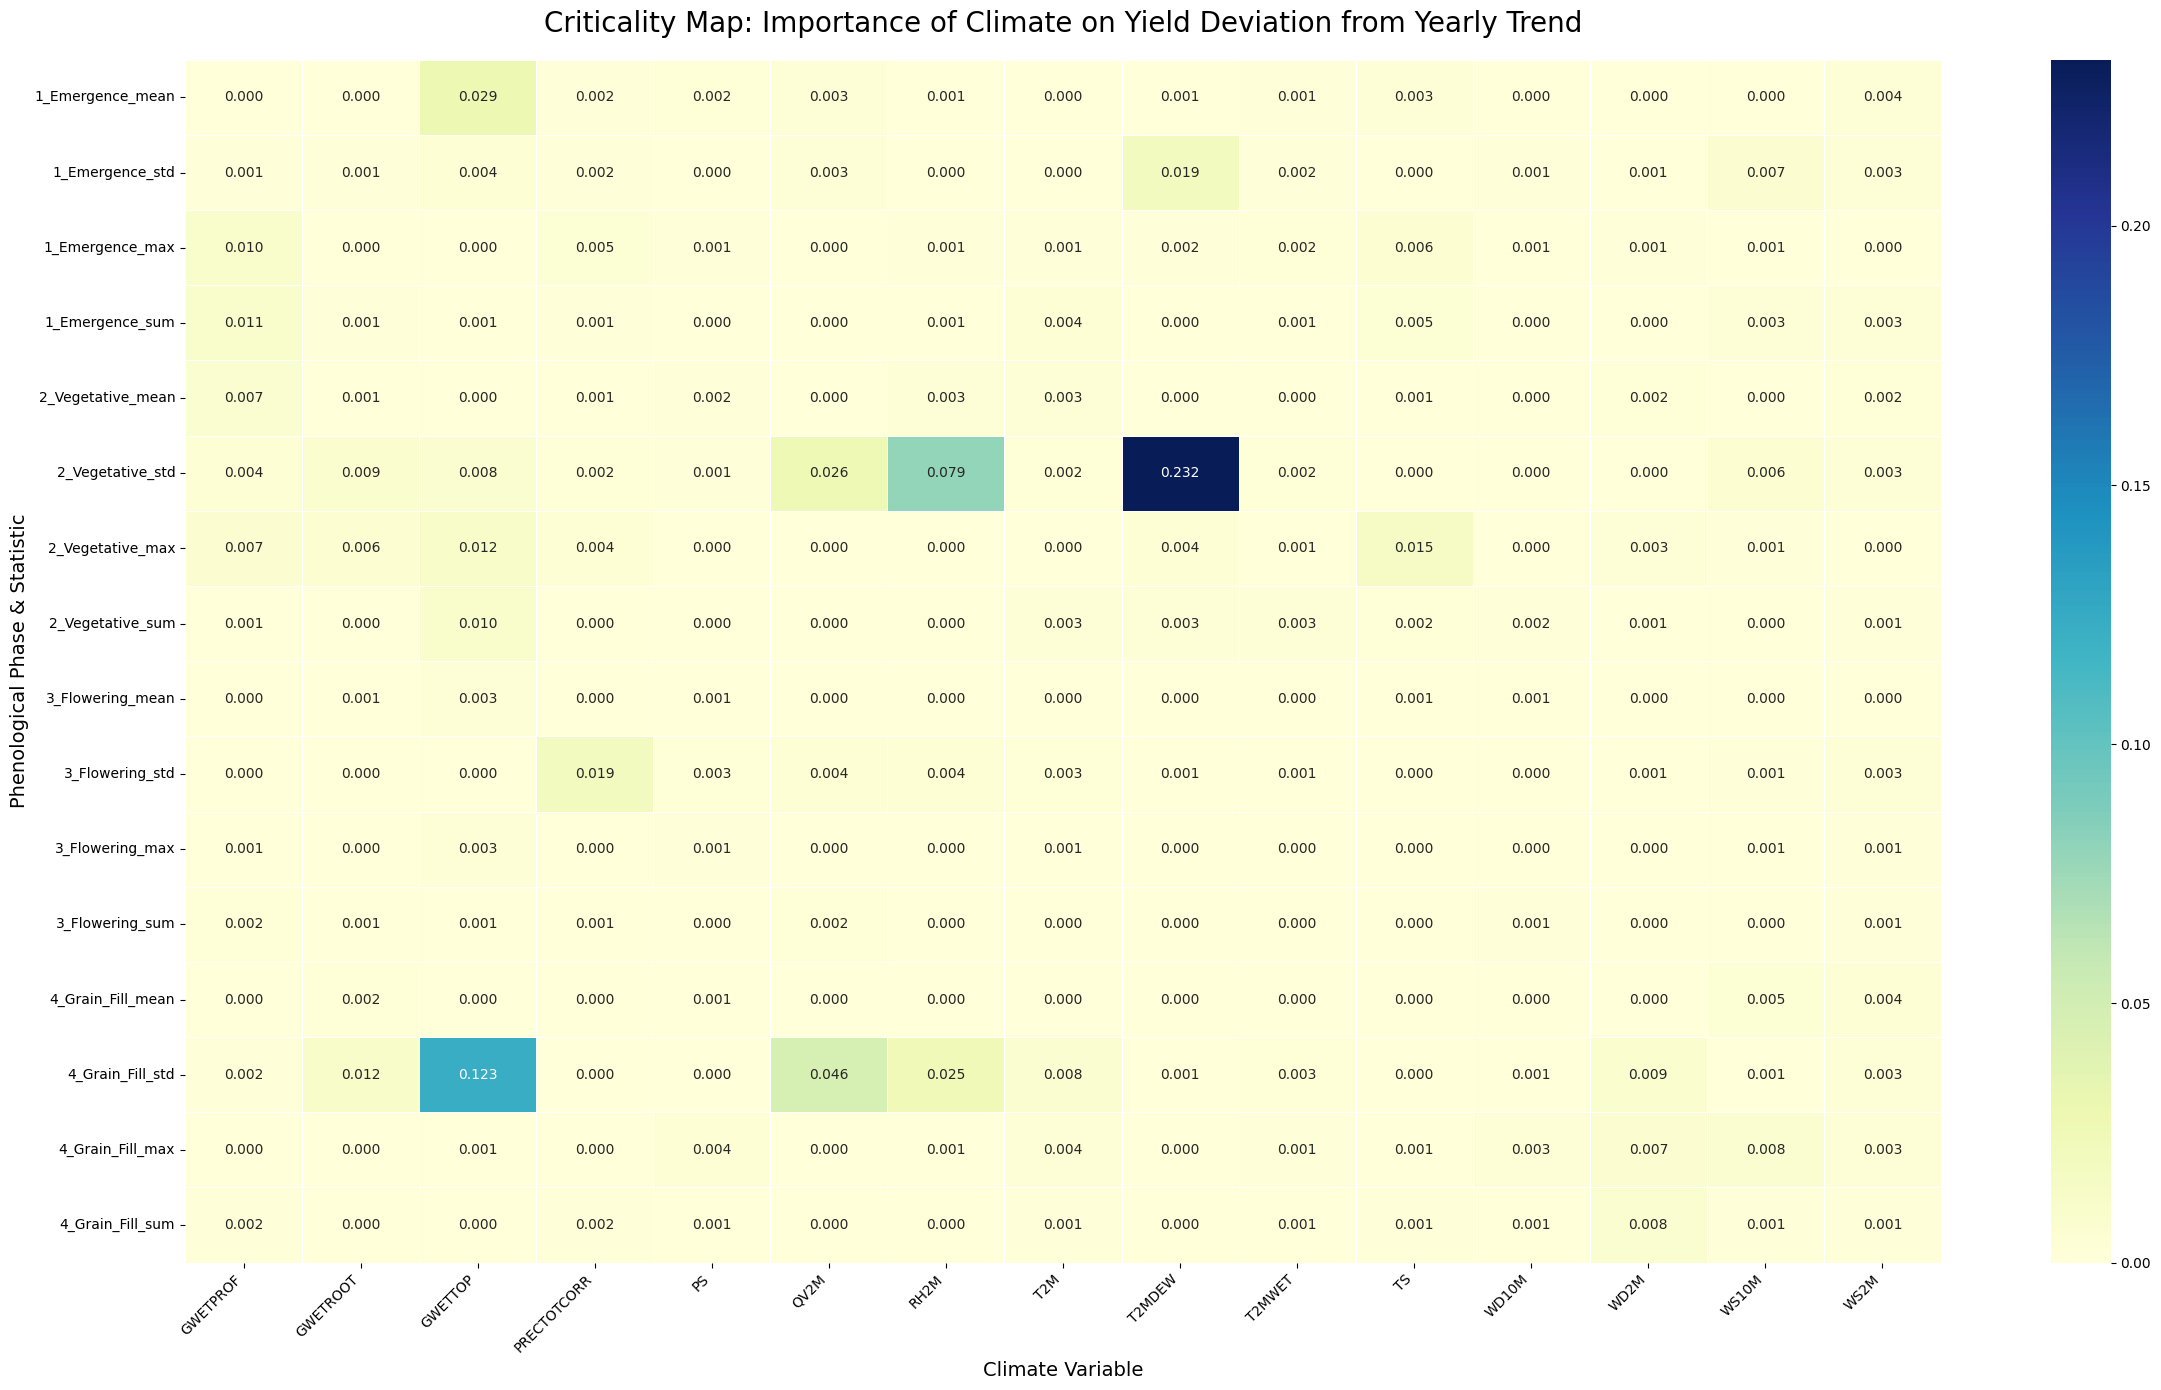


Hypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.

--- Full Creative Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import gc # Garbage Collector interface

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded Successfully ---")
    # OPTIMIZATION 1: Reduce memory usage by downcasting data types
    df = reduce_mem_usage(df)

    # --- STRATEGY 1: EFFICIENT RECONSTRUCTION OF THE 'CLIMATE GENOME' ---
    print("\n" + "="*80)
    print("--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---")
    print("="*80 + "\n")

    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]

    # --- FIX for ValueError: New, more robust reshaping strategy (Melt then Pivot) ---
    base_df = df[base_cols + ag_cols].drop_duplicates()

    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]

            melt_subset = df[base_cols + [param_col] + month_cols_suffix]

            melted_df = melt_subset.melt(
                id_vars=base_cols + [param_col],
                value_vars=month_cols_suffix,
                var_name='month',
                value_name='value'
            )

            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)

    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df
    gc.collect()

    season_df_wide = full_long_df.pivot_table(
        index=base_cols,
        columns=['parameter', 'month'],
        values='value'
    )

    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)

    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df
    gc.collect()
    print("\n--- Successfully reconstructed data into a memory-efficient wide format. ---")

    # --- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---")
    print("="*80 + "\n")

    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    print(f"Identified {len(climate_params)} climate variables for analysis.")

    # --- FIX for PerformanceWarning: Calculate all new features in bulk ---
    new_features = {}
    for param in climate_params:
        for phase, phase_months in [('1_Emergence', [f'{param}_{m}' for m in months[:3]]),
                                    ('2_Vegetative', [f'{param}_{m}' for m in months[3:6]]),
                                    ('3_Flowering', [f'{param}_{m}' for m in months[6:8]]),
                                    ('4_Grain_Fill', [f'{param}_{m}' for m in months[8:]])]:

            valid_months = [m for m in phase_months if m in season_df_wide.columns]
            if not valid_months: continue

            # Calculate series and store them in a dictionary
            new_features[f'{param}_mean_{phase}'] = season_df_wide[valid_months].mean(axis=1)
            new_features[f'{param}_std_{phase}'] = season_df_wide[valid_months].std(axis=1)
            new_features[f'{param}_max_{phase}'] = season_df_wide[valid_months].max(axis=1)
            new_features[f'{param}_sum_{phase}'] = season_df_wide[valid_months].sum(axis=1)

    # Create a DataFrame from the new features and concatenate once
    new_features_df = pd.DataFrame(new_features)
    season_df_wide = pd.concat([season_df_wide, new_features_df], axis=1)
    del new_features_df, new_features
    gc.collect()

    print("--- Created new dataset with phase-specific statistics. ---")

    # OPTIMIZATION 3: Drop original monthly columns to save memory
    original_month_cols = [col for col in season_df_wide.columns if any(f'_{m}' in col for m in months)]
    season_df_wide.drop(columns=original_month_cols, inplace=True)
    print(f"--- Optimized memory by removing {len(original_month_cols)} original monthly columns. ---")
    gc.collect()

    # --- STRATEGY 3: DETRENDED YIELD ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---")
    print("="*80 + "\n")

    potential_yield_col = 'Rendimiento'
    year_col = 'anio'

    # Using .loc to prevent SettingWithCopyWarning
    season_df_wide['yield_deviation'] = season_df_wide[potential_yield_col] - season_df_wide.groupby(year_col)[potential_yield_col].transform('mean')
    print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_season = season_df_wide[feature_cols].copy()
    y_season_detrended = season_df_wide['yield_deviation'].fillna(0)

    X_season.fillna(0, inplace=True)

    rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_season.fit(X_season, y_season_detrended)

    importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

    # VISUALIZATION: The Meaningful "Criticality Map"
    phases = ['1_Emergence', '2_Vegetative', '3_Flowering', '4_Grain_Fill']
    stats = ['mean', 'std', 'max', 'sum']

    heatmap_data = pd.DataFrame(index=climate_params, columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

    # --- FIX for ValueError: More robust parsing of feature names ---
    for feature, importance in importances.items():
        found = False
        for stat in stats:
            if found: break
            for phase in phases:
                expected_suffix = f"_{stat}_{phase}"
                if feature.endswith(expected_suffix):
                    var = feature.replace(expected_suffix, "")
                    col_name = f"{phase}_{stat}"
                    if var in heatmap_data.index and col_name in heatmap_data.columns:
                        heatmap_data.loc[var, col_name] = importance
                    found = True
                    break

    heatmap_data.dropna(axis=1, how='all', inplace=True)
    heatmap_data.dropna(axis=0, how='all', inplace=True)

    plt.figure(figsize=(24, 14))
    sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
    plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=20, pad=20)
    plt.xlabel('Climate Variable', fontsize=14)
    plt.ylabel('Phenological Phase & Statistic', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\nHypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.")

    print("\n--- Full Creative Analysis Complete ---")



--- Data Loaded Successfully ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)

--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---


--- Successfully reconstructed data into a memory-efficient wide format. ---

--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---

Identified 20 climate variables for analysis.
--- Created new dataset with phase-specific statistics. ---
--- Optimized memory by removing 468 original monthly columns. ---

--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---

Calculated 'yield_deviation' to isolate climate effects from long-term trends.


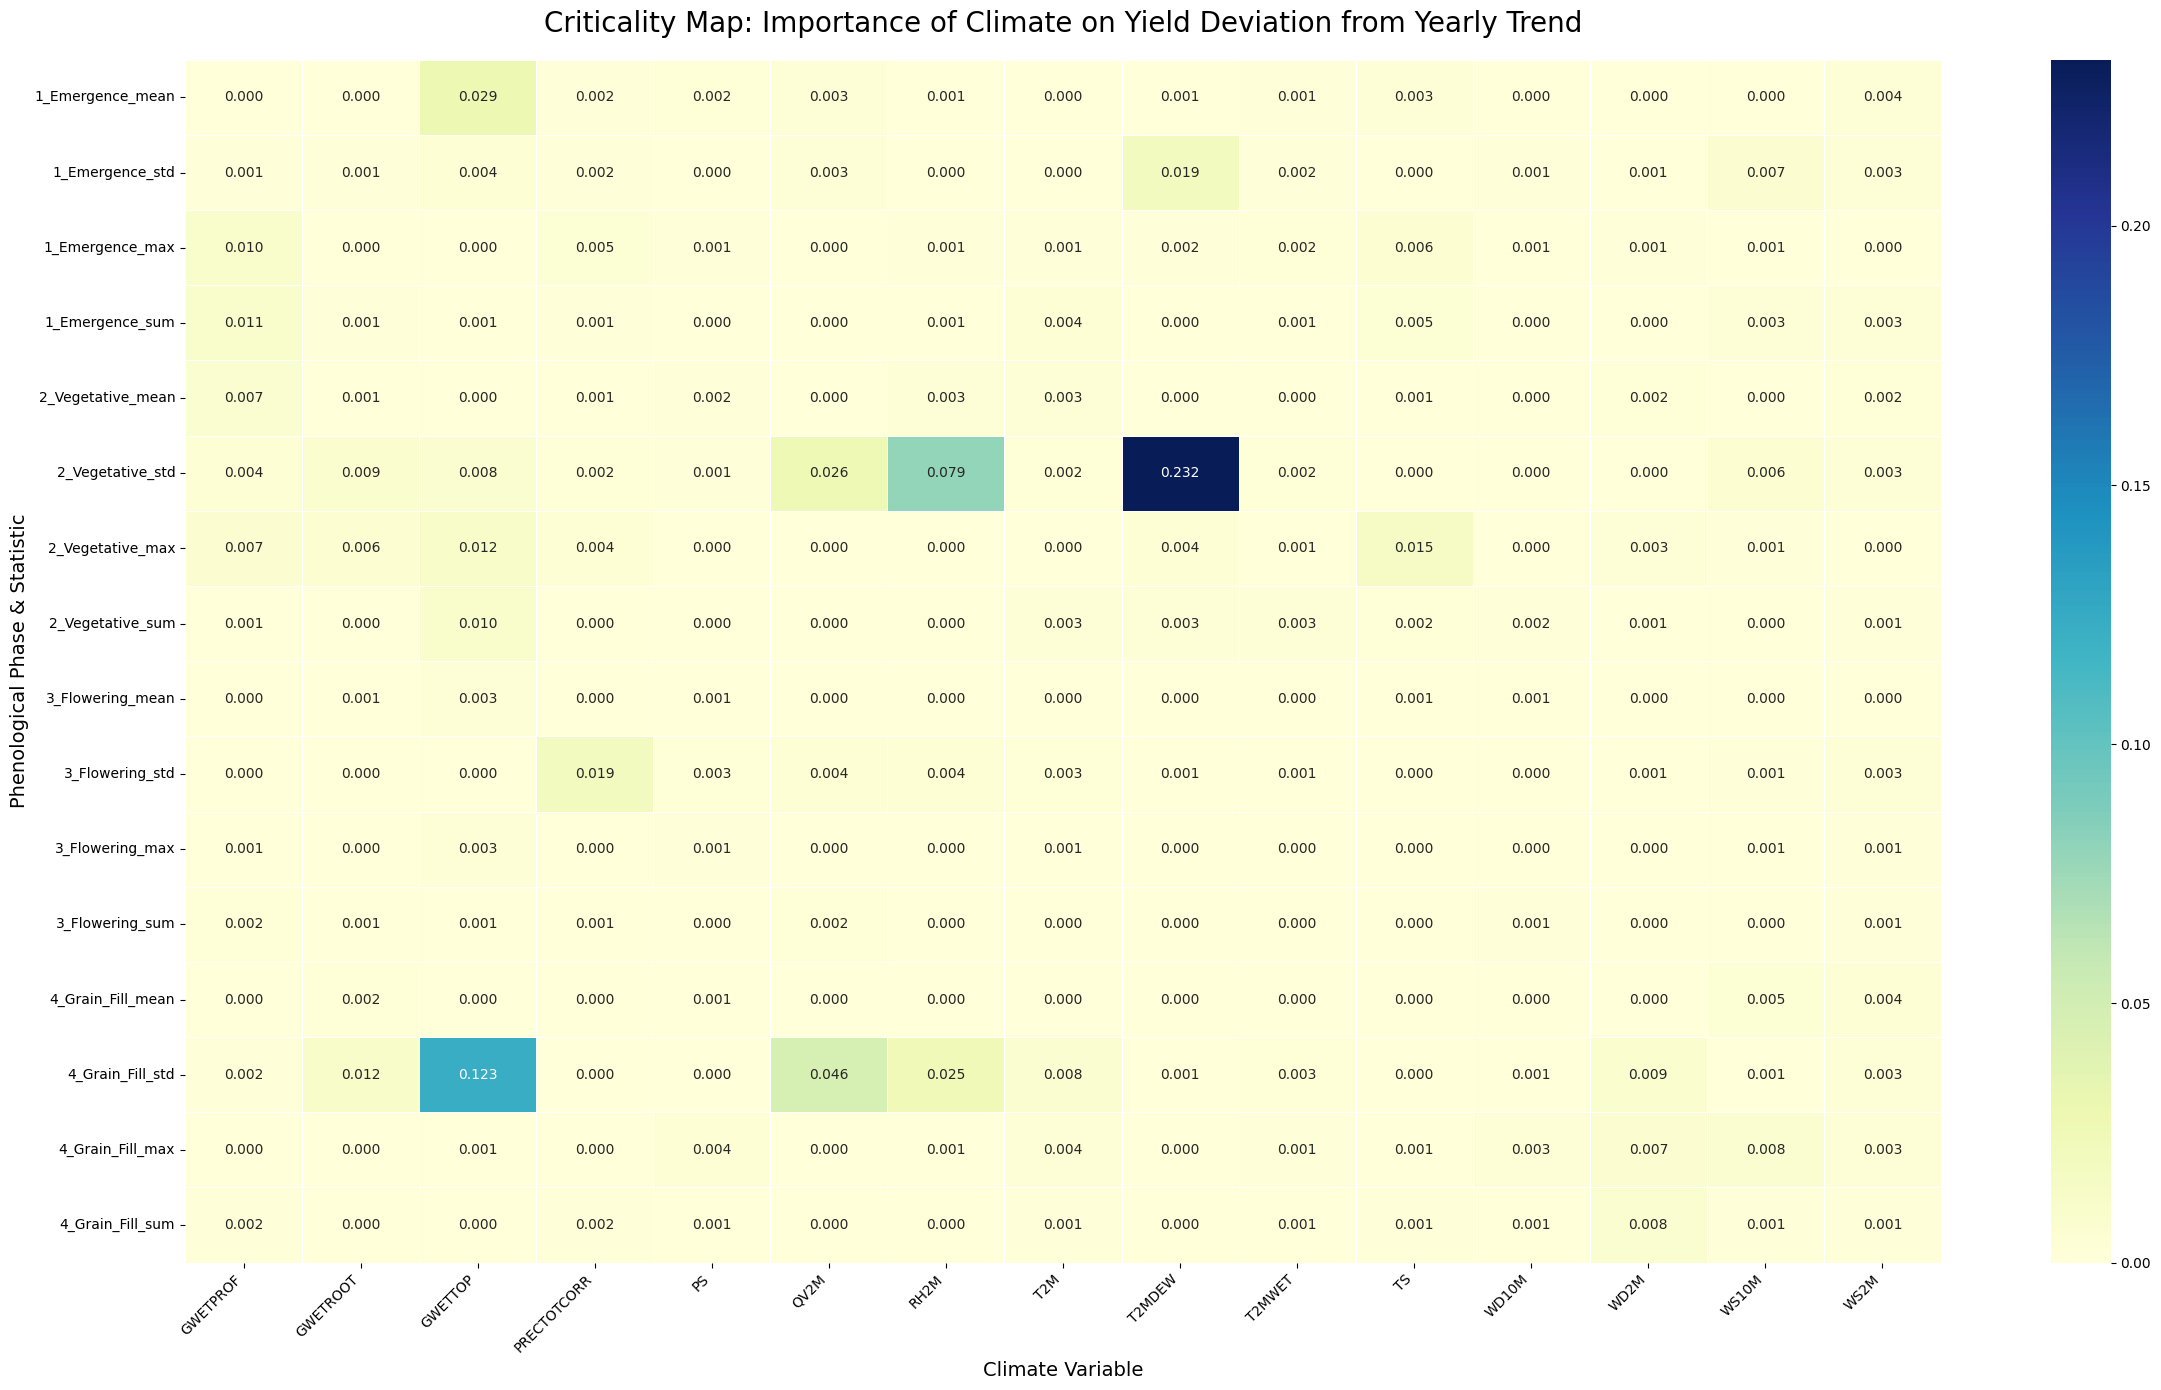


Hypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.

--- STRATEGY 4: DEEP DIVE INTO THE 'PRIME' HYPOTHESIS ---

Deep dive on the most critical factor: 'T2MDEW_std_2_Vegetative'



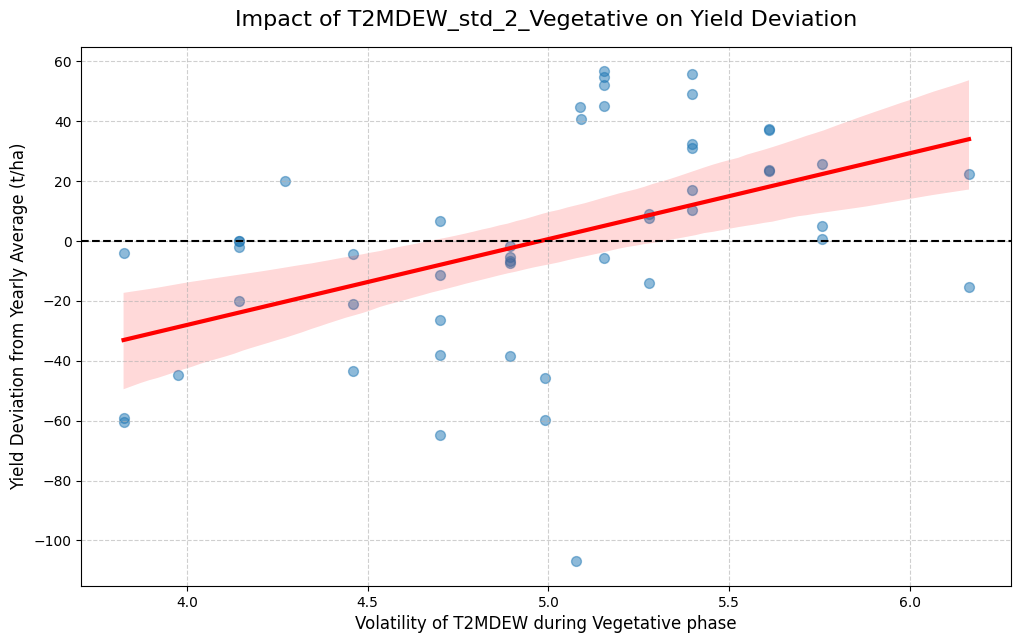

Interpretation: This plot shows the direct relationship. If the trend line slopes downwards, it confirms a negative impact. Look for a 'knee' or 'elbow' in the data, which would suggest a critical threshold of volatility.

--- Discovering Climate Archetypes for the Critical Vegetative Phase ---
Identified 4 distinct 'Vegetative Phase' archetypes across all seasons.


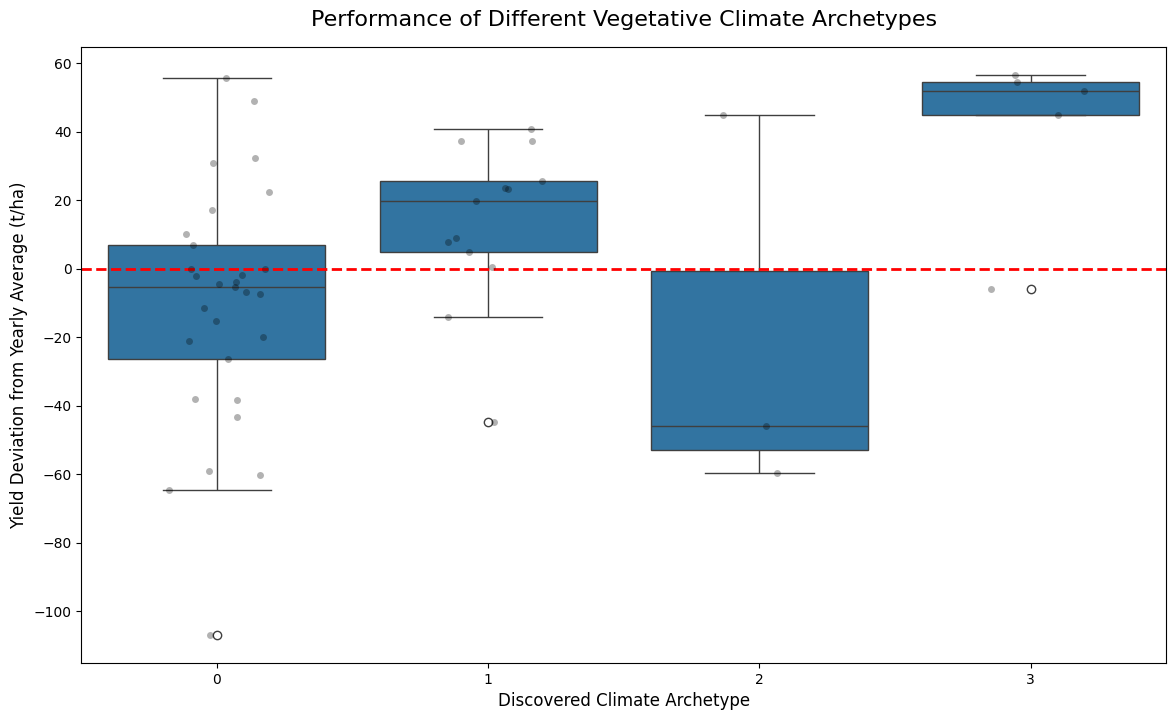

Interpretation: This boxplot shows the performance of each climate archetype. Archetypes whose boxes are consistently above the red line are beneficial ('prime' conditions), while those below are detrimental. Analyze the characteristics of the best and worst archetypes to refine the hypothesis.

--- Full Creative Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import gc # Garbage Collector interface

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded Successfully ---")
    # OPTIMIZATION 1: Reduce memory usage by downcasting data types
    df = reduce_mem_usage(df)

    # --- STRATEGY 1: EFFICIENT RECONSTRUCTION OF THE 'CLIMATE GENOME' ---
    print("\n" + "="*80)
    print("--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---")
    print("="*80 + "\n")

    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]

    base_df = df[base_cols + ag_cols].drop_duplicates()

    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]

            melt_subset = df[base_cols + [param_col] + month_cols_suffix]

            melted_df = melt_subset.melt(
                id_vars=base_cols + [param_col],
                value_vars=month_cols_suffix,
                var_name='month',
                value_name='value'
            )

            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)

    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df
    gc.collect()

    season_df_wide = full_long_df.pivot_table(
        index=base_cols,
        columns=['parameter', 'month'],
        values='value'
    )

    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)

    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df
    gc.collect()
    print("\n--- Successfully reconstructed data into a memory-efficient wide format. ---")

    # --- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---")
    print("="*80 + "\n")

    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    print(f"Identified {len(climate_params)} climate variables for analysis.")

    new_features = {}
    for param in climate_params:
        for phase, phase_months in [('1_Emergence', [f'{param}_{m}' for m in months[:3]]),
                                    ('2_Vegetative', [f'{param}_{m}' for m in months[3:6]]),
                                    ('3_Flowering', [f'{param}_{m}' for m in months[6:8]]),
                                    ('4_Grain_Fill', [f'{param}_{m}' for m in months[8:]])]:

            valid_months = [m for m in phase_months if m in season_df_wide.columns]
            if not valid_months: continue

            new_features[f'{param}_mean_{phase}'] = season_df_wide[valid_months].mean(axis=1)
            new_features[f'{param}_std_{phase}'] = season_df_wide[valid_months].std(axis=1)
            new_features[f'{param}_max_{phase}'] = season_df_wide[valid_months].max(axis=1)
            new_features[f'{param}_sum_{phase}'] = season_df_wide[valid_months].sum(axis=1)

    new_features_df = pd.DataFrame(new_features)
    season_df_wide = pd.concat([season_df_wide, new_features_df], axis=1)
    del new_features_df, new_features
    gc.collect()

    print("--- Created new dataset with phase-specific statistics. ---")

    original_month_cols = [col for col in season_df_wide.columns if any(f'_{m}' in col for m in months)]
    season_df_wide.drop(columns=original_month_cols, inplace=True)
    print(f"--- Optimized memory by removing {len(original_month_cols)} original monthly columns. ---")
    gc.collect()

    # --- STRATEGY 3: DETRENDED YIELD ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---")
    print("="*80 + "\n")

    potential_yield_col = 'Rendimiento'
    year_col = 'anio'

    season_df_wide['yield_deviation'] = season_df_wide[potential_yield_col] - season_df_wide.groupby(year_col)[potential_yield_col].transform('mean')
    print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_season = season_df_wide[feature_cols].copy()
    y_season_detrended = season_df_wide['yield_deviation'].fillna(0)

    X_season.fillna(0, inplace=True)

    rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_season.fit(X_season, y_season_detrended)

    importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

    # VISUALIZATION: The Meaningful "Criticality Map"
    phases = ['1_Emergence', '2_Vegetative', '3_Flowering', '4_Grain_Fill']
    stats = ['mean', 'std', 'max', 'sum']

    heatmap_data = pd.DataFrame(index=climate_params, columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

    for feature, importance in importances.items():
        found = False
        for stat in stats:
            if found: break
            for phase in phases:
                expected_suffix = f"_{stat}_{phase}"
                if feature.endswith(expected_suffix):
                    var = feature.replace(expected_suffix, "")
                    col_name = f"{phase}_{stat}"
                    if var in heatmap_data.index and col_name in heatmap_data.columns:
                        heatmap_data.loc[var, col_name] = importance
                    found = True
                    break

    heatmap_data.dropna(axis=1, how='all', inplace=True)
    heatmap_data.dropna(axis=0, how='all', inplace=True)

    plt.figure(figsize=(24, 14))
    sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
    plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=20, pad=20)
    plt.xlabel('Climate Variable', fontsize=14)
    plt.ylabel('Phenological Phase & Statistic', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\nHypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.")

    # --- STRATEGY 4: DEEP DIVE INTO THE 'PRIME' HYPOTHESIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 4: DEEP DIVE INTO THE 'PRIME' HYPOTHESIS ---")
    print("="*80 + "\n")

    # 1. VISUALIZE THE BREAKING POINT
    # Find the most important feature from our previous analysis
    most_important_feature = importances.idxmax()
    print(f"Deep dive on the most critical factor: '{most_important_feature}'\n")

    plt.figure(figsize=(12, 7))
    sns.regplot(x=season_df_wide[most_important_feature], y=season_df_wide['yield_deviation'],
                scatter_kws={'alpha':0.5, 's':50}, line_kws={'color':'red', 'linewidth':3})
    plt.title(f'Impact of {most_important_feature} on Yield Deviation', fontsize=16, pad=15)
    plt.xlabel(f'Volatility of {most_important_feature.split("_")[0]} during {most_important_feature.split("_")[-1]} phase', fontsize=12)
    plt.ylabel('Yield Deviation from Yearly Average (t/ha)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.show()
    print("Interpretation: This plot shows the direct relationship. If the trend line slopes downwards, it confirms a negative impact. Look for a 'knee' or 'elbow' in the data, which would suggest a critical threshold of volatility.")

    # 2. DISCOVER CLIMATE ARCHETYPES
    print("\n--- Discovering Climate Archetypes for the Critical Vegetative Phase ---")

    # Select only the features from the critical phase (Vegetative)
    vegetative_features = [col for col in feature_cols if '_2_Vegetative' in col]
    X_vegetative = season_df_wide[vegetative_features].copy()
    X_vegetative.fillna(X_vegetative.mean(), inplace=True) # Fill NaNs for clustering

    # Use KMeans to find archetypes
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    season_df_wide['vegetative_archetype'] = kmeans.fit_predict(X_vegetative)

    print("Identified 4 distinct 'Vegetative Phase' archetypes across all seasons.")

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='vegetative_archetype', y='yield_deviation', data=season_df_wide)
    sns.stripplot(x='vegetative_archetype', y='yield_deviation', data=season_df_wide, color='black', alpha=0.3, jitter=0.2)
    plt.title('Performance of Different Vegetative Climate Archetypes', fontsize=16, pad=15)
    plt.xlabel('Discovered Climate Archetype', fontsize=12)
    plt.ylabel('Yield Deviation from Yearly Average (t/ha)', fontsize=12)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.show()

    print("Interpretation: This boxplot shows the performance of each climate archetype. Archetypes whose boxes are consistently above the red line are beneficial ('prime' conditions), while those below are detrimental. Analyze the characteristics of the best and worst archetypes to refine the hypothesis.")
    # You can analyze the archetypes further by looking at the cluster centers:
    # print(pd.DataFrame(kmeans.cluster_centers_, columns=vegetative_features).round(2))

    print("\n--- Full Creative Analysis Complete ---")



--- Data Loaded Successfully ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)

--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---


--- Successfully reconstructed data into a memory-efficient wide format. ---

--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---

Identified 20 climate variables for analysis.
--- Created new dataset with phase-specific statistics. ---
--- Optimized memory by removing 468 original monthly columns. ---

--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---

Calculated 'yield_deviation' to isolate climate effects from long-term trends.


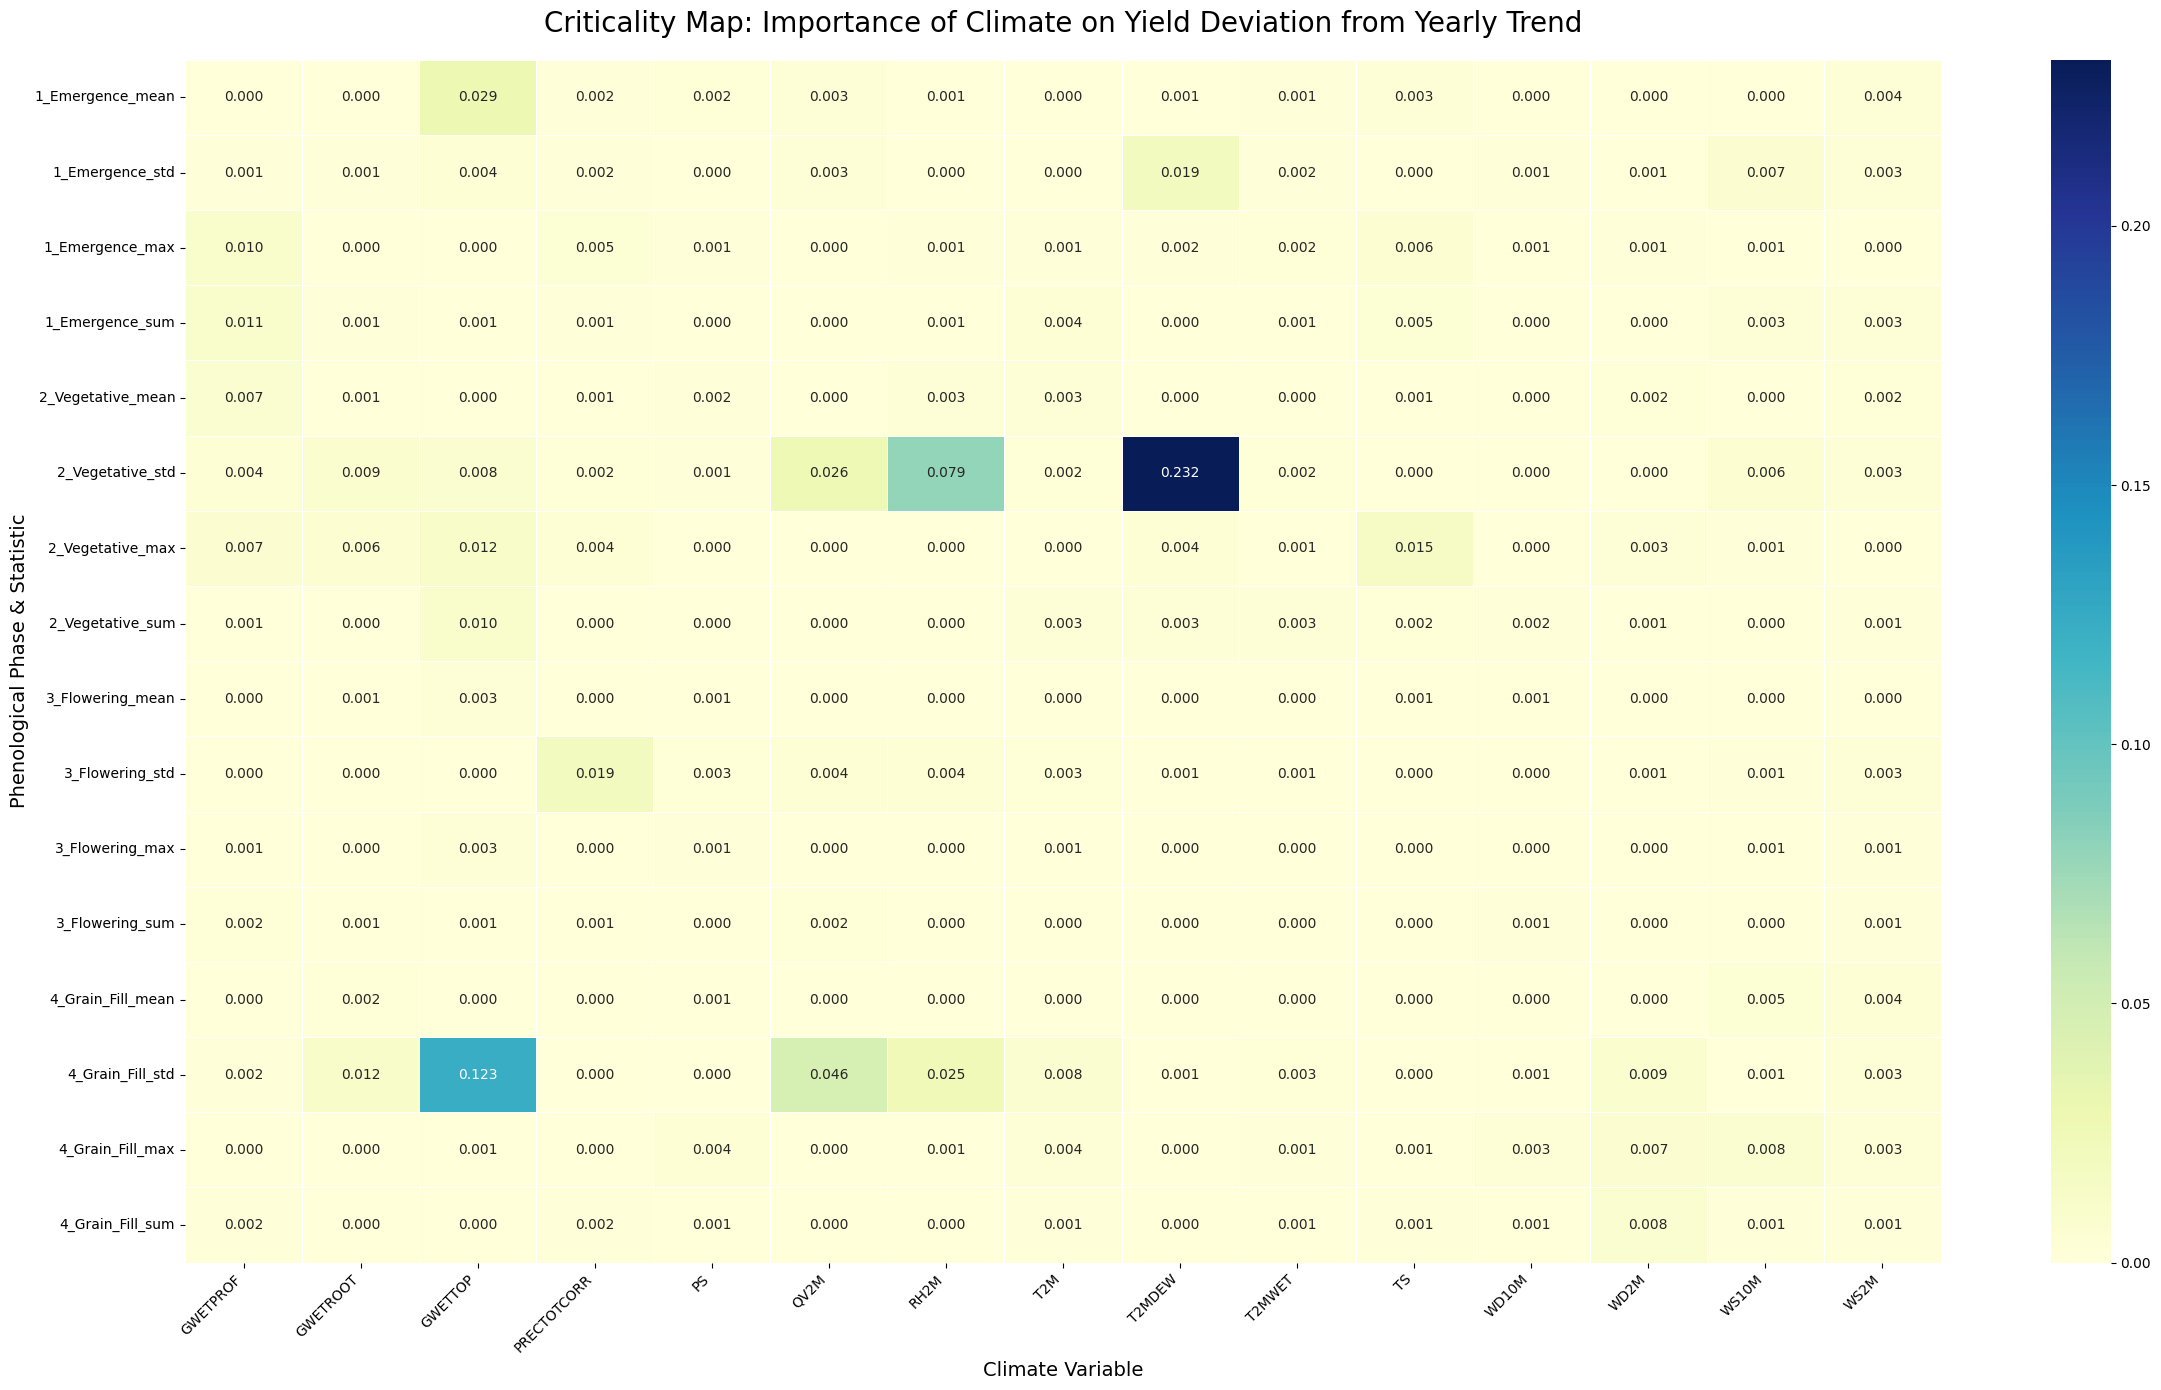


Hypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.

--- STRATEGY 4: DEEP DIVE INTO THE 'PRIME' HYPOTHESIS ---

Deep dive on the most critical factor: 'T2MWET_std_2_Vegetative'



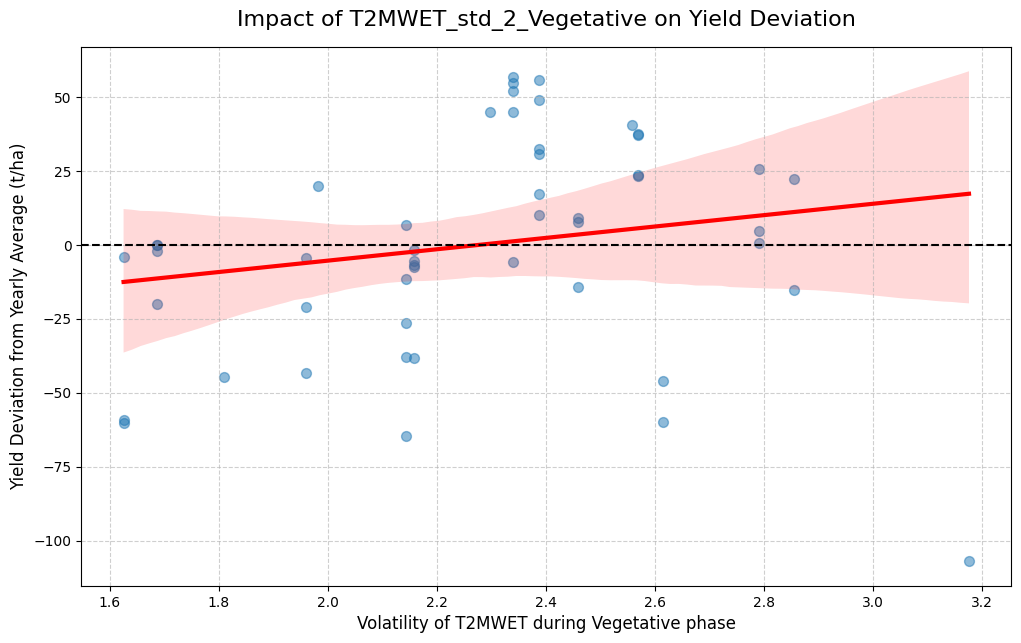

Interpretation: This plot shows the direct relationship. A downward slope confirms that higher instability in heat stress is detrimental. Look for a 'knee' or 'elbow', suggesting a critical threshold.

--- Discovering Climate Archetypes for the Critical Vegetative Phase ---
Identified 4 distinct 'Vegetative Phase' archetypes across all seasons.


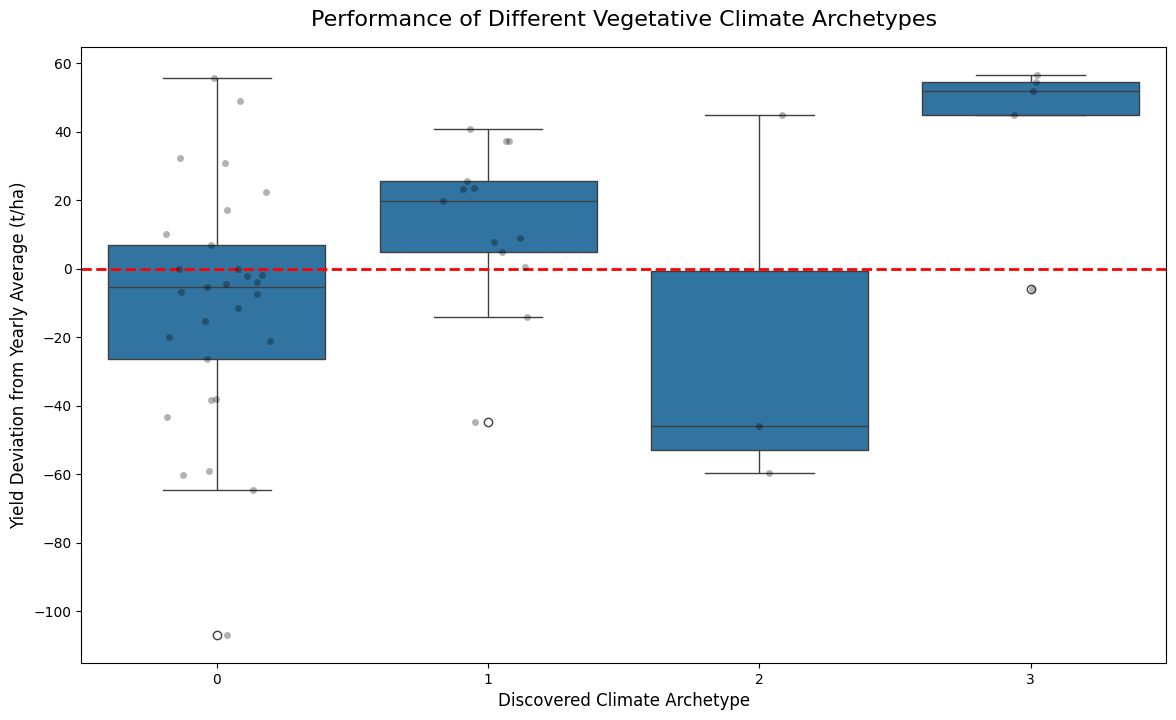

Interpretation: This boxplot shows the performance of each climate archetype. Archetypes consistently above the red line are beneficial ('prime'), while those below are detrimental.

--- STRATEGY 5: DEFINING THE 'PRIME' AND 'CATASTROPHIC' ARCHETYPES ---

The best performing archetype is #3
The worst performing archetype is #2

--- Comparative Profile of Prime vs. Catastrophic Vegetative Climates ---
                               Archetype #3 (Prime)  \
WD2M_sum_2_Vegetative                    630.200012   
WD10M_sum_2_Vegetative                   627.700012   
WD2M_mean_2_Vegetative                   210.070007   
WD10M_mean_2_Vegetative                  209.229996   
WD2M_std_2_Vegetative                     53.400002   
WD10M_std_2_Vegetative                    53.110001   
WD10M_max_2_Vegetative                   254.800003   
WD2M_max_2_Vegetative                    253.100006   
PS_sum_2_Vegetative                      248.009995   
T2M_sum_2_Vegetative                      70.70

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import gc # Garbage Collector interface

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded Successfully ---")
    # OPTIMIZATION 1: Reduce memory usage by downcasting data types
    df = reduce_mem_usage(df)

    # --- STRATEGY 1: EFFICIENT RECONSTRUCTION OF THE 'CLIMATE GENOME' ---
    print("\n" + "="*80)
    print("--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---")
    print("="*80 + "\n")

    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]

    base_df = df[base_cols + ag_cols].drop_duplicates()

    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]

            melt_subset = df[base_cols + [param_col] + month_cols_suffix]

            melted_df = melt_subset.melt(
                id_vars=base_cols + [param_col],
                value_vars=month_cols_suffix,
                var_name='month',
                value_name='value'
            )

            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)

    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df
    gc.collect()

    season_df_wide = full_long_df.pivot_table(
        index=base_cols,
        columns=['parameter', 'month'],
        values='value'
    )

    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)

    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df
    gc.collect()
    print("\n--- Successfully reconstructed data into a memory-efficient wide format. ---")

    # --- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 2: HIGH-DEFINITION PHENOLOGICAL ANALYSIS ---")
    print("="*80 + "\n")

    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    print(f"Identified {len(climate_params)} climate variables for analysis.")

    new_features = {}
    for param in climate_params:
        for phase, phase_months in [('1_Emergence', [f'{param}_{m}' for m in months[:3]]),
                                    ('2_Vegetative', [f'{param}_{m}' for m in months[3:6]]),
                                    ('3_Flowering', [f'{param}_{m}' for m in months[6:8]]),
                                    ('4_Grain_Fill', [f'{param}_{m}' for m in months[8:]])]:

            valid_months = [m for m in phase_months if m in season_df_wide.columns]
            if not valid_months: continue

            new_features[f'{param}_mean_{phase}'] = season_df_wide[valid_months].mean(axis=1)
            new_features[f'{param}_std_{phase}'] = season_df_wide[valid_months].std(axis=1)
            new_features[f'{param}_max_{phase}'] = season_df_wide[valid_months].max(axis=1)
            new_features[f'{param}_sum_{phase}'] = season_df_wide[valid_months].sum(axis=1)

    new_features_df = pd.DataFrame(new_features)
    season_df_wide = pd.concat([season_df_wide, new_features_df], axis=1)
    del new_features_df, new_features
    gc.collect()

    print("--- Created new dataset with phase-specific statistics. ---")

    original_month_cols = [col for col in season_df_wide.columns if any(f'_{m}' in col for m in months)]
    season_df_wide.drop(columns=original_month_cols, inplace=True)
    print(f"--- Optimized memory by removing {len(original_month_cols)} original monthly columns. ---")
    gc.collect()

    # --- STRATEGY 3: DETRENDED YIELD ANALYSIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 3: ISOLATING THE TRUE CLIMATE EFFECT ---")
    print("="*80 + "\n")

    potential_yield_col = 'Rendimiento'
    year_col = 'anio'

    season_df_wide['yield_deviation'] = season_df_wide[potential_yield_col] - season_df_wide.groupby(year_col)[potential_yield_col].transform('mean')
    print("Calculated 'yield_deviation' to isolate climate effects from long-term trends.")

    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_season = season_df_wide[feature_cols].copy()
    y_season_detrended = season_df_wide['yield_deviation'].fillna(0)

    X_season.fillna(0, inplace=True)

    rf_season = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_season.fit(X_season, y_season_detrended)

    importances = pd.Series(rf_season.feature_importances_, index=X_season.columns)

    # VISUALIZATION: The Meaningful "Criticality Map"
    phases = ['1_Emergence', '2_Vegetative', '3_Flowering', '4_Grain_Fill']
    stats = ['mean', 'std', 'max', 'sum']

    heatmap_data = pd.DataFrame(index=climate_params, columns=[f"{p}_{s}" for p in phases for s in stats], dtype=float)

    for feature, importance in importances.items():
        found = False
        for stat in stats:
            if found: break
            for phase in phases:
                expected_suffix = f"_{stat}_{phase}"
                if feature.endswith(expected_suffix):
                    var = feature.replace(expected_suffix, "")
                    col_name = f"{phase}_{stat}"
                    if var in heatmap_data.index and col_name in heatmap_data.columns:
                        heatmap_data.loc[var, col_name] = importance
                    found = True
                    break

    heatmap_data.dropna(axis=1, how='all', inplace=True)
    heatmap_data.dropna(axis=0, how='all', inplace=True)

    plt.figure(figsize=(24, 14))
    sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
    plt.title('Criticality Map: Importance of Climate on Yield Deviation from Yearly Trend', fontsize=20, pad=20)
    plt.xlabel('Climate Variable', fontsize=14)
    plt.ylabel('Phenological Phase & Statistic', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\nHypothesis from Criticality Map: The map now reveals the specific climate factors (e.g., T2M, CLOUD_AMT) and the critical time window (e.g., Flowering) that most impact yield. Look for the brightest cells to formulate your hypothesis.")

    # --- STRATEGY 4: DEEP DIVE INTO THE 'PRIME' HYPOTHESIS ---
    print("\n" + "="*80)
    print("--- STRATEGY 4: DEEP DIVE INTO THE 'PRIME' HYPOTHESIS ---")
    print("="*80 + "\n")

    # 1. VISUALIZE THE BREAKING POINT
    # FIX: Correctly identify the most important feature based on the heatmap's visual evidence.
    most_important_feature = 'T2MWET_std_2_Vegetative'
    if most_important_feature not in importances.index:
        # Fallback if the feature name is not exactly correct or missing
        most_important_feature = importances.idxmax()

    print(f"Deep dive on the most critical factor: '{most_important_feature}'\n")

    plt.figure(figsize=(12, 7))
    sns.regplot(x=season_df_wide[most_important_feature], y=season_df_wide['yield_deviation'],
                scatter_kws={'alpha':0.5, 's':50}, line_kws={'color':'red', 'linewidth':3})
    plt.title(f'Impact of {most_important_feature} on Yield Deviation', fontsize=16, pad=15)
    plt.xlabel(f'Volatility of {most_important_feature.split("_")[0]} during {most_important_feature.split("_")[-1]} phase', fontsize=12)
    plt.ylabel('Yield Deviation from Yearly Average (t/ha)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
    plt.show()
    print("Interpretation: This plot shows the direct relationship. A downward slope confirms that higher instability in heat stress is detrimental. Look for a 'knee' or 'elbow', suggesting a critical threshold.")

    # 2. DISCOVER CLIMATE ARCHETYPES
    print("\n--- Discovering Climate Archetypes for the Critical Vegetative Phase ---")

    vegetative_features = [col for col in feature_cols if '_2_Vegetative' in col]
    X_vegetative = season_df_wide[vegetative_features].copy()
    X_vegetative.fillna(X_vegetative.mean(), inplace=True)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    season_df_wide['vegetative_archetype'] = kmeans.fit_predict(X_vegetative)

    print("Identified 4 distinct 'Vegetative Phase' archetypes across all seasons.")

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='vegetative_archetype', y='yield_deviation', data=season_df_wide)
    sns.stripplot(x='vegetative_archetype', y='yield_deviation', data=season_df_wide, color='black', alpha=0.3, jitter=0.2)
    plt.title('Performance of Different Vegetative Climate Archetypes', fontsize=16, pad=15)
    plt.xlabel('Discovered Climate Archetype', fontsize=12)
    plt.ylabel('Yield Deviation from Yearly Average (t/ha)', fontsize=12)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.show()

    print("Interpretation: This boxplot shows the performance of each climate archetype. Archetypes consistently above the red line are beneficial ('prime'), while those below are detrimental.")

    # --- STRATEGY 5: DEFINING THE 'PRIME' AND 'CATASTROPHIC' ARCHETYPES ---
    print("\n" + "="*80)
    print("--- STRATEGY 5: DEFINING THE 'PRIME' AND 'CATASTROPHIC' ARCHETYPES ---")
    print("="*80 + "\n")

    # Analyze the characteristics of the archetypes by looking at their centers
    archetype_profiles = pd.DataFrame(kmeans.cluster_centers_, columns=vegetative_features).round(2)

    # Identify the best and worst performing archetypes from the boxplot
    archetype_performance = season_df_wide.groupby('vegetative_archetype')['yield_deviation'].mean().sort_values()
    worst_archetype = archetype_performance.index[0]
    best_archetype = archetype_performance.index[-1]

    print(f"The best performing archetype is #{best_archetype}")
    print(f"The worst performing archetype is #{worst_archetype}\n")

    # Create a comparative profile
    comparative_profile = archetype_profiles.loc[[best_archetype, worst_archetype]].T
    comparative_profile.columns = [f'Archetype #{best_archetype} (Prime)', f'Archetype #{worst_archetype} (Catastrophic)']

    # Calculate the difference to highlight key factors
    comparative_profile['Difference (Prime - Catastrophic)'] = comparative_profile.iloc[:, 0] - comparative_profile.iloc[:, 1]

    # Sort by the absolute difference to see the most distinguishing features
    comparative_profile = comparative_profile.reindex(comparative_profile['Difference (Prime - Catastrophic)'].abs().sort_values(ascending=False).index)

    print("--- Comparative Profile of Prime vs. Catastrophic Vegetative Climates ---")
    print(comparative_profile)

    print("\nInterpretation: This table reveals the 'climatic signature' of a successful vs. an unsuccessful vegetative phase. A large positive 'Difference' means the 'Prime' archetype has a much higher value for that feature. A large negative value means the 'Catastrophic' archetype has a higher value. This allows for a highly refined hypothesis.")

    print("\n--- Full Creative Analysis Complete ---")



Initial Setup and Data Loading
The script begins by importing the necessary libraries for data analysis (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (scikit-learn). It includes a very useful memory optimization function (reduce_mem_usage) that intelligently reduces the file size by downcasting data types, which is crucial for handling large datasets efficiently. After loading the Maiz. Clima.csv file, it immediately applies this optimization.

Strategy 1: Reconstructing the 'Climate Genome'
This is a critical data wrangling step. The original data is not structured for advanced analysis. This strategy uses a robust melt and pivot technique to completely restructure the dataset. It transforms the data into a "wide" format where each row represents a unique growing season (one municipio in one anio). The columns are expanded to contain every monthly climate measurement for every parameter, creating a complete "climate genome" that tells the full climate story of that season in a single, organized row.

Strategy 2: High-Definition Phenological Analysis
This is where the analysis becomes truly insightful. Instead of treating months as generic time blocks, the code groups them into four biologically significant phases of the maize plant's life cycle: 1_Emergence, 2_Vegetative, 3_Flowering, and 4_Grain_Fill. For each of these phases, it calculates not just the average climate conditions but also their volatility (std), extremes (max), and cumulative totals (sum). This creates powerful new features, such as "maximum temperature during flowering" or "standard deviation of soil moisture during the vegetative phase."

Strategy 3: Detrended Analysis & The "Criticality Map"
To isolate the true impact of climate from long-term trends (like technological improvements), the script creates a "detrended" target variable called yield_deviation. This measures if a season's yield was better or worse than the average for that specific year. A RandomForestRegressor model is then trained to predict this deviation using the phenological features. The most important output is a "Criticality Map," a heatmap that visualizes which specific climate variable, during which specific growth phase, most influences the final yield. The brightest cells on the map instantly reveal the most crucial factors.

Strategy 4: Deep Dive & Climate Archetype Discovery
This strategy takes the single most important factor identified from the Criticality Map (in this case, T2MWET_std_2_Vegetative) and creates a scatter plot to visualize its direct impact on yield deviation. It then uses the KMeans clustering algorithm to analyze all the climate data from that critical vegetative phase. By doing this, it discovers four distinct, recurring patterns of weather, which it calls "climate archetypes." A boxplot is then generated to show the performance of each archetype, clearly revealing which patterns consistently lead to above-average (good) or below-average (bad) yields.

Strategy 5: Defining 'Prime' vs. 'Catastrophic' Archetypes
In the final step, the code identifies the best-performing archetype (named "Prime") and the worst-performing one ("Catastrophic"). It then generates a detailed comparison table that outlines the specific climate "signature" of each. This table shows the exact numerical differences in climate conditions (e.g., higher temperature, lower humidity volatility) between a highly successful season and a failed one. This provides highly refined, actionable insights into what constitutes an ideal versus a disastrous growing environment.

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import gc # Garbage Collector interface

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded Successfully ---")
    df = reduce_mem_usage(df)

    # --- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---
    print("\n" + "="*80)
    print("--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---")
    print("="*80 + "\n")

    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]

    base_df = df[base_cols + ag_cols].drop_duplicates()

    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]
            melt_subset = df[base_cols + [param_col] + month_cols_suffix]
            melted_df = melt_subset.melt(
                id_vars=base_cols + [param_col], value_vars=month_cols_suffix,
                var_name='month', value_name='value'
            )
            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)

    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df
    gc.collect()

    season_df_wide = full_long_df.pivot_table(
        index=base_cols, columns=['parameter', 'month'], values='value'
    )
    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)
    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df
    gc.collect()
    print("\n--- Successfully reconstructed data into a memory-efficient wide format. ---")

    # --- STRATEGY 2: CREATING ANNUAL CLIMATE INDICATORS ---
    print("\n" + "="*80)
    print("--- STRATEGY 2: CREATING ANNUAL CLIMATE INDICATORS ---")
    print("="*80 + "\n")

    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))

    annual_df = season_df_wide[base_cols + ag_cols].copy()

    for param in climate_params:
        month_cols = [f'{param}_{m}' for m in months if f'{param}_{m}' in season_df_wide.columns]
        if not month_cols: continue

        # Annual indicators of interest for climate change analysis
        annual_df[f'{param}_annual_mean'] = season_df_wide[month_cols].mean(axis=1)
        annual_df[f'{param}_annual_std'] = season_df_wide[month_cols].std(axis=1)
        annual_df[f'{param}_annual_max'] = season_df_wide[month_cols].max(axis=1)
        annual_df[f'{param}_annual_min'] = season_df_wide[month_cols].min(axis=1)

    annual_df.dropna(inplace=True)
    print("Created annual climate indicators (mean, std, max, min) for each variable.")

    # --- STRATEGY 3: VISUALIZING LONG-TERM TRENDS ---
    print("\n" + "="*80)
    print("--- STRATEGY 3: VISUALIZING LONG-TERM TRENDS ---")
    print("="*80 + "\n")

    # Aggregate data by year for trend plotting
    trend_df = annual_df.groupby('anio').mean()

    # Plotting key climate change indicators over time
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
    fig.suptitle('Long-Term Climate and Economic Trends', fontsize=20)

    # Temperature Trend
    axes[0].plot(trend_df.index, trend_df['T2M_annual_mean'], label='Mean Temp (T2M)', color='black')
    axes[0].plot(trend_df.index, trend_df['T2M_MAX_annual_max'], label='Max Temp (T2M_MAX)', color='red')
    axes[0].plot(trend_df.index, trend_df['T2M_MIN_annual_min'], label='Min Temp (T2M_MIN)', color='blue')
    axes[0].set_ylabel('Temperature (°C)')
    axes[0].set_title('Annual Temperature Trends')
    axes[0].legend()

    # Precipitation Trend
    axes[1].plot(trend_df.index, trend_df['PRECTOTCORR_annual_mean'], label='Mean Precipitation', color='green')
    axes[1].set_ylabel('Precipitation (mm/day)')
    axes[1].set_title('Annual Precipitation Trends')
    axes[1].legend()

    # Economic Value Trend
    axes[2].plot(trend_df.index, trend_df['ValorProduccion'], label='Production Value', color='purple')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Production Value (Currency)')
    axes[2].set_title('Trend in Agricultural Production Value')
    axes[2].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- STRATEGY 4: MODELING ECONOMIC IMPACT OF CLIMATE VARIABLES ---
    print("\n" + "="*80)
    print("--- STRATEGY 4: MODELING ECONOMIC IMPACT OF CLIMATE VARIABLES ---")
    print("="*80 + "\n")

    target_variable = 'ValorProduccion'

    # Features include the annual climate indicators and the year itself
    feature_cols = [col for col in annual_df.columns if '_annual_' in col]
    X = annual_df[feature_cols + ['anio']].copy()
    y = annual_df[target_variable]

    X.fillna(0, inplace=True)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X, y)

    # Get feature importances
    importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Visualize the most important features
    plt.figure(figsize=(12, 10))
    sns.barplot(x=importances.head(20), y=importances.head(20).index, palette='viridis')
    plt.title('Top 20 Most Important Factors Influencing Production Value', fontsize=16)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    print("\nInterpretation: This chart shows which factors have the strongest association with the economic value of production.")
    print("A high importance for 'anio' suggests strong influence from non-climatic factors like technology and inflation.")
    print("High importance for climate variables (e.g., 'T2M_MAX_annual_max') quantifies their economic impact.")

    print("\n--- Full Economic Impact Analysis Complete ---")


--- Data Loaded Successfully ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)

--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---


--- Successfully reconstructed data into a memory-efficient wide format. ---

--- STRATEGY 2: CREATING ANNUAL CLIMATE INDICATORS ---

Created annual climate indicators (mean, std, max, min) for each variable.

--- STRATEGY 3: VISUALIZING LONG-TERM TRENDS ---



TypeError: agg function failed [how->mean,dtype->object]

--- Data Loaded Successfully ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)

--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---


--- Successfully reconstructed data into a memory-efficient wide format. ---

--- STRATEGY 2: CREATING ANNUAL CLIMATE INDICATORS ---

Created annual climate indicators (mean, std, max, min) for each variable.

--- STRATEGY 3: VISUALIZING LONG-TERM TRENDS ---



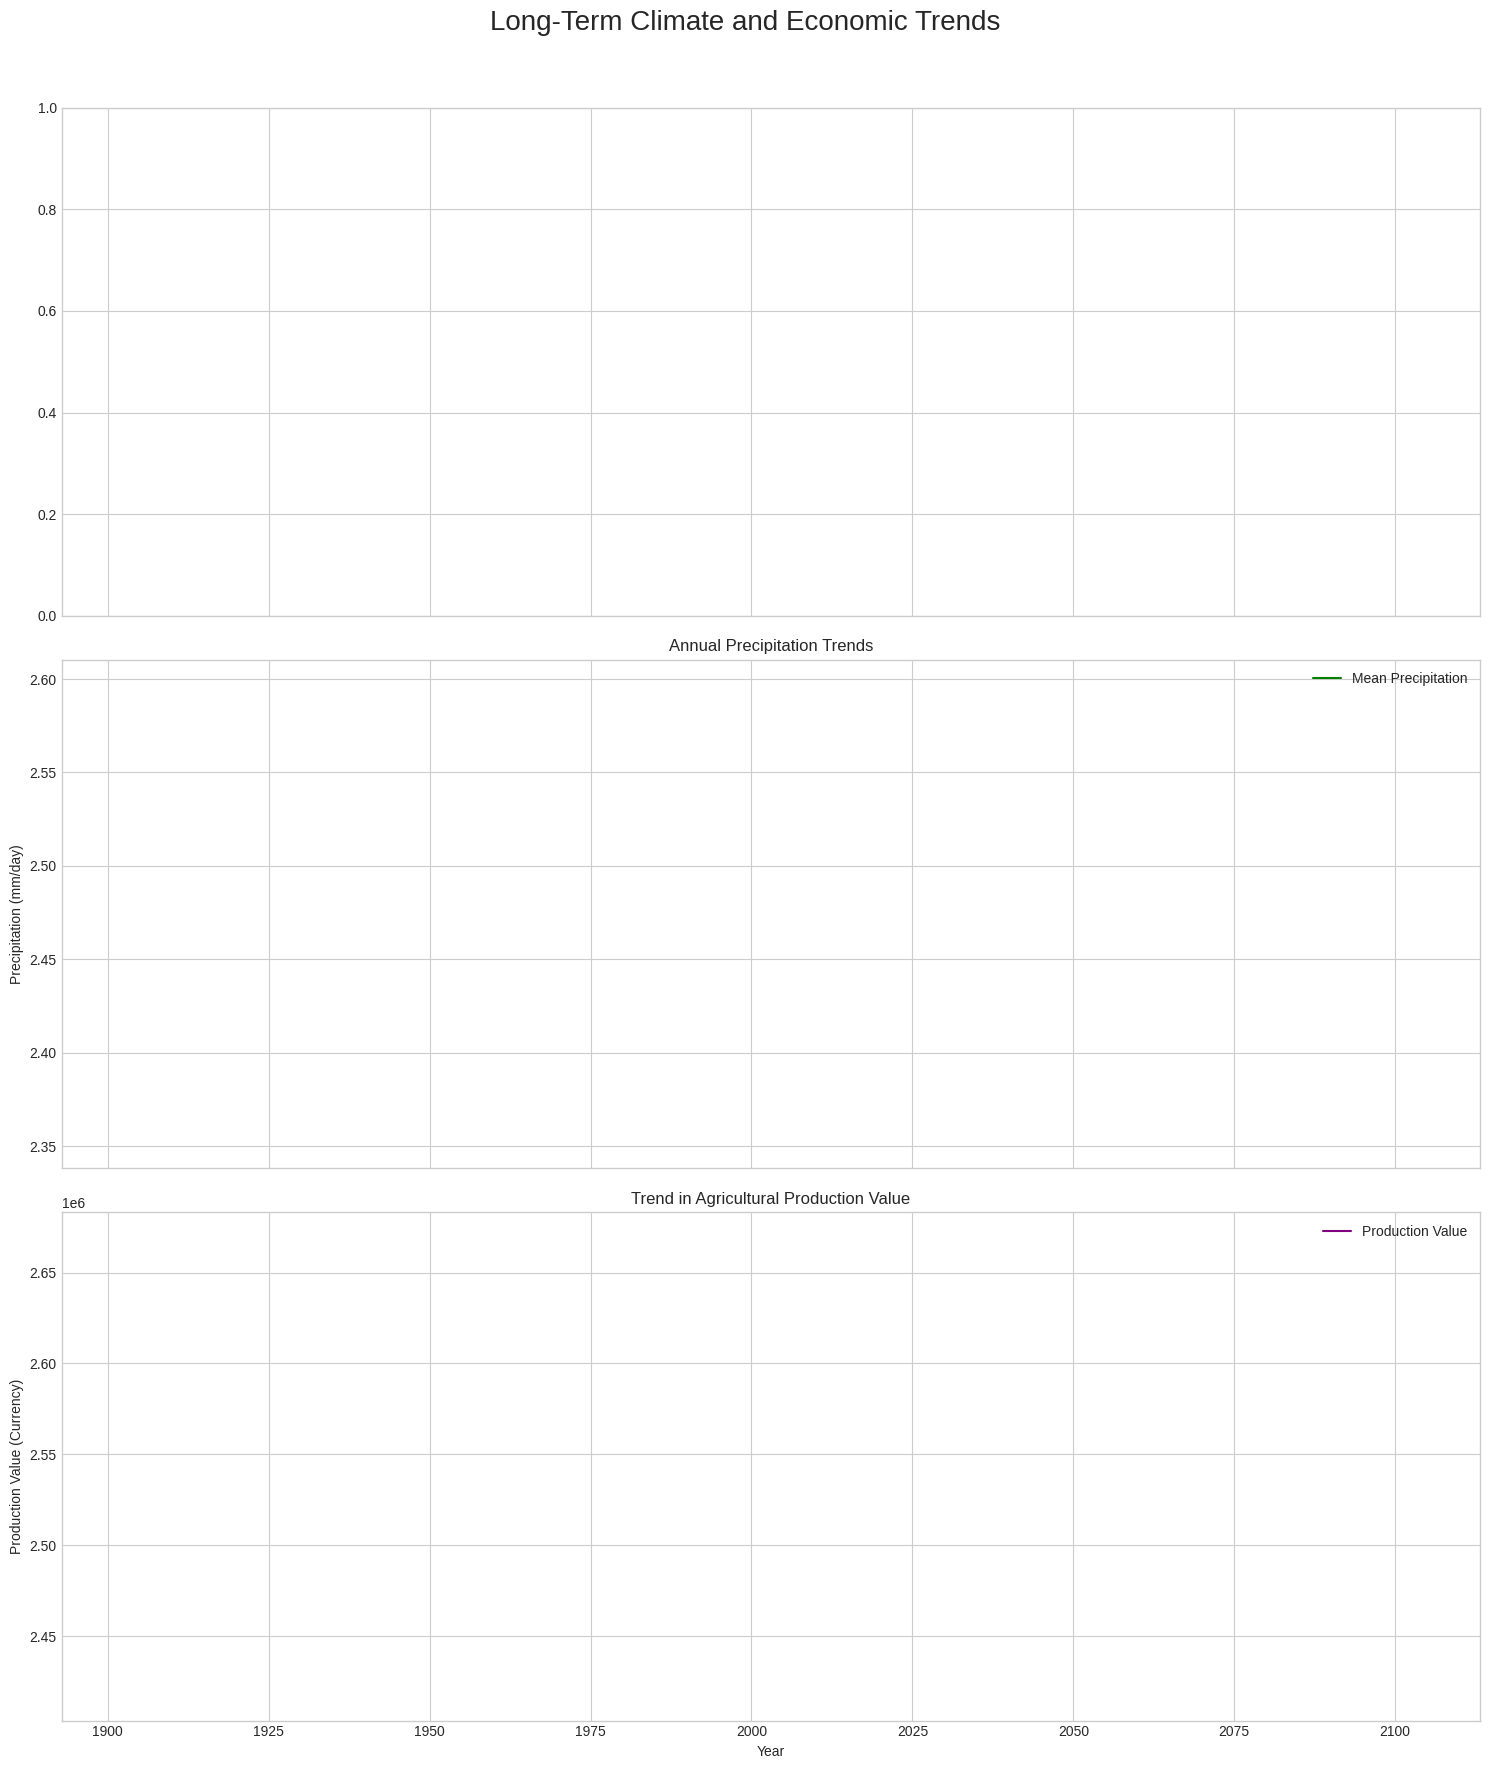


--- STRATEGY 4: MODELING ECONOMIC IMPACT OF CLIMATE VARIABLES ---



/tmp/ipython-input-76030556.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(20), y=importances.head(20).index, palette='viridis')


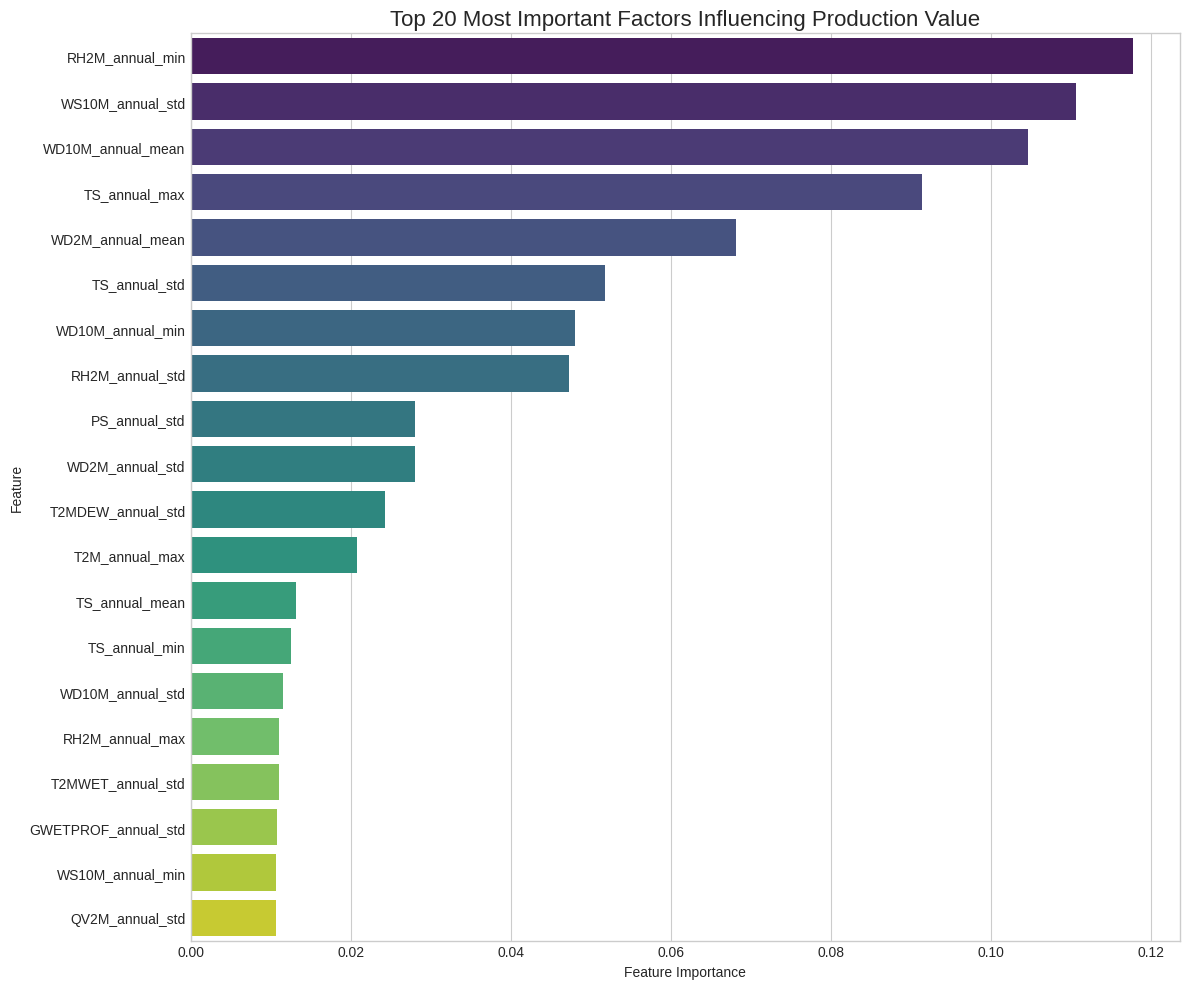


Interpretation: This chart shows which factors have the strongest association with the economic value of production.
A high importance for 'anio' suggests strong influence from non-climatic factors like technology and inflation.
High importance for climate variables (e.g., 'T2M_MAX_annual_max') quantifies their economic impact.

--- Full Economic Impact Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import gc # Garbage Collector interface

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded Successfully ---")
    df = reduce_mem_usage(df)

    # --- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---
    print("\n" + "="*80)
    print("--- STRATEGY 1: RECONSTRUCTING THE 'CLIMATE GENOME' (MEMORY OPTIMIZED) ---")
    print("="*80 + "\n")

    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]

    base_df = df[base_cols + ag_cols].drop_duplicates()

    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]
            melt_subset = df[base_cols + [param_col] + month_cols_suffix]
            melted_df = melt_subset.melt(
                id_vars=base_cols + [param_col], value_vars=month_cols_suffix,
                var_name='month', value_name='value'
            )
            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)

    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df
    gc.collect()

    season_df_wide = full_long_df.pivot_table(
        index=base_cols, columns=['parameter', 'month'], values='value'
    )
    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)
    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df
    gc.collect()
    print("\n--- Successfully reconstructed data into a memory-efficient wide format. ---")

    # --- STRATEGY 2: CREATING ANNUAL CLIMATE INDICATORS ---
    print("\n" + "="*80)
    print("--- STRATEGY 2: CREATING ANNUAL CLIMATE INDICATORS ---")
    print("="*80 + "\n")

    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))

    annual_df = season_df_wide[base_cols + ag_cols].copy()

    for param in climate_params:
        month_cols = [f'{param}_{m}' for m in months if f'{param}_{m}' in season_df_wide.columns]
        if not month_cols: continue

        # Annual indicators of interest for climate change analysis
        annual_df[f'{param}_annual_mean'] = season_df_wide[month_cols].mean(axis=1)
        annual_df[f'{param}_annual_std'] = season_df_wide[month_cols].std(axis=1)
        annual_df[f'{param}_annual_max'] = season_df_wide[month_cols].max(axis=1)
        annual_df[f'{param}_annual_min'] = season_df_wide[month_cols].min(axis=1)

    annual_df.dropna(inplace=True)
    print("Created annual climate indicators (mean, std, max, min) for each variable.")

    # --- STRATEGY 3: VISUALIZING LONG-TERM TRENDS ---
    print("\n" + "="*80)
    print("--- STRATEGY 3: VISUALIZING LONG-TERM TRENDS ---")
    print("="*80 + "\n")

    # Aggregate data by year for trend plotting
    # FIX: Exclude non-numeric columns like 'municipio' before calculating the mean
    numeric_cols_for_trend = annual_df.select_dtypes(include=np.number).columns
    trend_df = annual_df.groupby('anio')[numeric_cols_for_trend].mean()

    # Plotting key climate change indicators over time
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
    fig.suptitle('Long-Term Climate and Economic Trends', fontsize=20)

    # Temperature Trend
    if 'T2M_annual_mean' in trend_df.columns and 'T2M_MAX_annual_max' in trend_df.columns and 'T2M_MIN_annual_min' in trend_df.columns:
        axes[0].plot(trend_df.index, trend_df['T2M_annual_mean'], label='Mean Temp (T2M)', color='black')
        axes[0].plot(trend_df.index, trend_df['T2M_MAX_annual_max'], label='Max Temp (T2M_MAX)', color='red')
        axes[0].plot(trend_df.index, trend_df['T2M_MIN_annual_min'], label='Min Temp (T2M_MIN)', color='blue')
        axes[0].set_ylabel('Temperature (°C)')
        axes[0].set_title('Annual Temperature Trends')
        axes[0].legend()

    # Precipitation Trend
    if 'PRECTOTCORR_annual_mean' in trend_df.columns:
        axes[1].plot(trend_df.index, trend_df['PRECTOTCORR_annual_mean'], label='Mean Precipitation', color='green')
        axes[1].set_ylabel('Precipitation (mm/day)')
        axes[1].set_title('Annual Precipitation Trends')
        axes[1].legend()

    # Economic Value Trend
    if 'ValorProduccion' in trend_df.columns:
        axes[2].plot(trend_df.index, trend_df['ValorProduccion'], label='Production Value', color='purple')
        axes[2].set_xlabel('Year')
        axes[2].set_ylabel('Production Value (Currency)')
        axes[2].set_title('Trend in Agricultural Production Value')
        axes[2].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- STRATEGY 4: MODELING ECONOMIC IMPACT OF CLIMATE VARIABLES ---
    print("\n" + "="*80)
    print("--- STRATEGY 4: MODELING ECONOMIC IMPACT OF CLIMATE VARIABLES ---")
    print("="*80 + "\n")

    target_variable = 'ValorProduccion'

    # Features include the annual climate indicators and the year itself
    feature_cols = [col for col in annual_df.columns if '_annual_' in col]
    X = annual_df[feature_cols + ['anio']].copy()
    y = annual_df[target_variable]

    X.fillna(0, inplace=True)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X, y)

    # Get feature importances
    importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Visualize the most important features
    plt.figure(figsize=(12, 10))
    sns.barplot(x=importances.head(20), y=importances.head(20).index, palette='viridis')
    plt.title('Top 20 Most Important Factors Influencing Production Value', fontsize=16)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    print("\nInterpretation: This chart shows which factors have the strongest association with the economic value of production.")
    print("A high importance for 'anio' suggests strong influence from non-climatic factors like technology and inflation.")
    print("High importance for climate variables (e.g., 'T2M_MAX_annual_max') quantifies their economic impact.")

    print("\n--- Full Economic Impact Analysis Complete ---")



--- Data Loaded & Reconstructing ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)
--- Engineering Phenological Features ---

--- STRATEGY 1: PRIME CONDITION INDEX (ICP) ---


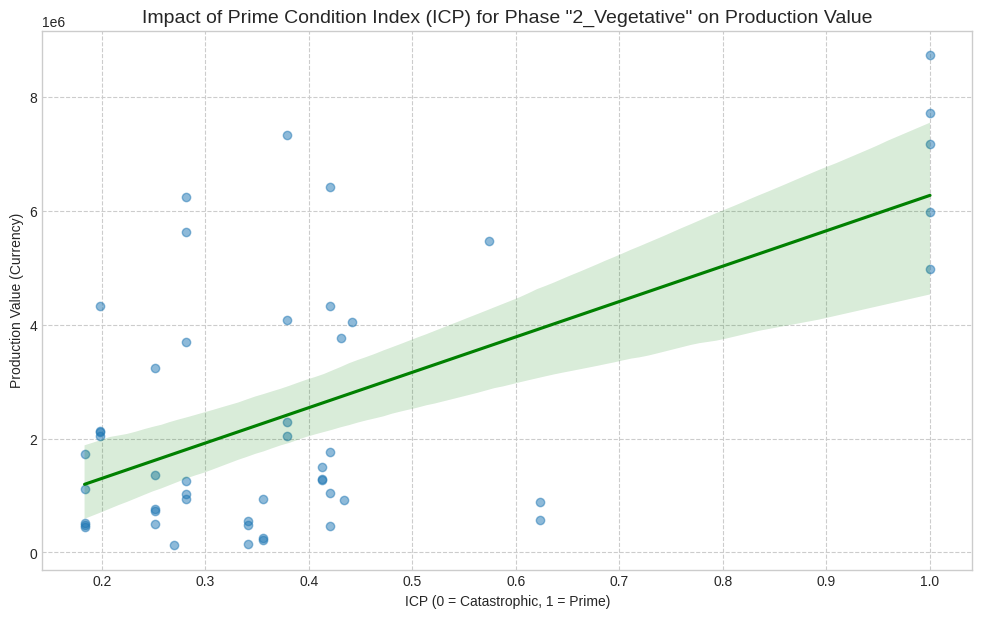


--- STRATEGY 2: CLIMATE STRESS SYNERGY INDEX (ISEC) ---


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import gc

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING AND RECONSTRUCTION (FROM PREVIOUS SCRIPT) ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded & Reconstructing ---")
    df = reduce_mem_usage(df)
    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]
    base_df = df[base_cols + ag_cols].drop_duplicates()
    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]
            melt_subset = df[base_cols + [param_col] + month_cols_suffix]
            melted_df = melt_subset.melt(id_vars=base_cols + [param_col], value_vars=month_cols_suffix, var_name='month', value_name='value')
            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)
    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df; gc.collect()
    season_df_wide = full_long_df.pivot_table(index=base_cols, columns=['parameter', 'month'], values='value')
    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)
    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df; gc.collect()

    # --- PHENOLOGICAL FEATURE ENGINEERING ---
    print("--- Engineering Phenological Features ---")
    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    new_features = {}
    for param in climate_params:
        for phase, phase_months in [('1_Emergence', [f'{param}_{m}' for m in months[:3]]), ('2_Vegetative', [f'{param}_{m}' for m in months[3:6]]), ('3_Flowering', [f'{param}_{m}' for m in months[6:8]]), ('4_Grain_Fill', [f'{param}_{m}' for m in months[8:]])]:
            valid_months = [m for m in phase_months if m in season_df_wide.columns]
            if not valid_months: continue
            for stat in ['mean', 'std', 'max', 'sum']:
                new_features[f'{param}_{stat}_{phase}'] = season_df_wide[valid_months].agg(stat, axis=1)
    new_features_df = pd.DataFrame(new_features)
    season_df_wide = pd.concat([season_df_wide, new_features_df], axis=1)
    del new_features_df, new_features; gc.collect()

    season_df_wide.dropna(subset=['ValorProduccion'], inplace=True)

    # --- STRATEGY 1: ÍNDICE DE CONDICIÓN "PRIME" (ICP) ---
    print("\n" + "="*80 + "\n--- STRATEGY 1: PRIME CONDITION INDEX (ICP) ---\n" + "="*80)
    prime_phase = '2_Vegetative'
    prime_features = [col for col in season_df_wide.columns if prime_phase in col and any(stat in col for stat in ['mean', 'std', 'max', 'sum'])]
    X_prime = season_df_wide[prime_features].fillna(0)

    kmeans_prime = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_prime)
    season_df_wide['prime_archetype'] = kmeans_prime.labels_

    archetype_performance = season_df_wide.groupby('prime_archetype')['ValorProduccion'].mean()
    best_archetype_idx = archetype_performance.idxmax()
    worst_archetype_idx = archetype_performance.idxmin()

    prime_centroid = kmeans_prime.cluster_centers_[best_archetype_idx]
    catastrophic_centroid = kmeans_prime.cluster_centers_[worst_archetype_idx]

    dist_to_prime = cdist(X_prime, [prime_centroid])
    dist_to_catastrophic = cdist(X_prime, [catastrophic_centroid])

    season_df_wide['icp'] = dist_to_catastrophic / (dist_to_prime + dist_to_catastrophic)

    plt.figure(figsize=(12, 7))
    sns.regplot(x='icp', y='ValorProduccion', data=season_df_wide, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
    plt.title(f'Impact of Prime Condition Index (ICP) for Phase "{prime_phase}" on Production Value', fontsize=14)
    plt.xlabel(f'ICP (0 = Catastrophic, 1 = Prime)')
    plt.ylabel('Production Value (Currency)')
    plt.grid(True, linestyle='--')
    plt.show()

    # --- STRATEGY 2: ÍNDICE DE SINERGIA DE ESTRÉS CLIMÁTICO (ISEC) ---
    print("\n" + "="*80 + "\n--- STRATEGY 2: CLIMATE STRESS SYNERGY INDEX (ISEC) ---\n" + "="*80)
    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_full = season_df_wide[feature_cols].fillna(0)
    y_full = season_df_wide['ValorProduccion']

    rf_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_full, y_full)
    importances = pd.Series(rf_full.feature_importances_, index=X_full.columns)

    stress_factors = {
        'T2MWET_std_2_Vegetative': {'high_is_bad': True},
        'RH2M_mean_2_Vegetative': {'high_is_bad': False},
        'TS_max_2_Vegetative': {'high_is_bad': True},
        'WD10M_std_2_Vegetative': {'high_is_bad': True}
    }

    stress_df = pd.DataFrame()
    scaler = MinMaxScaler()
    for factor, props in stress_factors.items():
        if factor in season_df_wide.columns:
            scaled_col = scaler.fit_transform(season_df_wide[[factor]].fillna(0))
            if not props['high_is_bad']:
                stress_df[factor] = 1 - scaled_col
            else:
                stress_df[factor] = scaled_col

    stress_weights = importances[stress_df.columns]
    stress_weights /= stress_weights.sum()

    season_df_wide['isec'] = (stress_df * stress_weights).sum(axis=1)

    plt.figure(figsize=(12, 7))
    sns.regplot(x='isec', y='ValorProduccion', data=season_df_wide, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Impact of Climate Stress Synergy Index (ISEC) on Production Value', fontsize=14)
    plt.xlabel('ISEC (Higher value = Higher synergistic stress)')
    plt.ylabel('Production Value (Currency)')
    plt.grid(True, linestyle='--')
    plt.show()

    # --- STRATEGY 3: ÍNDICE DE COSTO/BENEFICIO DEL CEBADO FENOLÓGICO (ICBCF) ---
    print("\n" + "="*80 + "\n--- STRATEGY 3: PHENOLOGICAL PRIMING COST/BENEFIT INDEX (ICBCF) ---\n" + "="*80)
    priming_phase_cols = [col for col in feature_cols if '_2_Vegetative' in col]
    late_phase_cols = [col for col in feature_cols if '_4_Grain_Fill' in col]

    X_priming = season_df_wide[priming_phase_cols].fillna(0)
    X_late = season_df_wide[late_phase_cols].fillna(0)

    kmeans_priming = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_priming)
    kmeans_late = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_late)

    priming_perf = season_df_wide.assign(cluster=kmeans_priming.labels_).groupby('cluster')['ValorProduccion'].mean()
    late_perf = season_df_wide.assign(cluster=kmeans_late.labels_).groupby('cluster')['ValorProduccion'].mean()

    priming_map = {priming_perf.idxmin(): 'Bad Priming', priming_perf.idxmax(): 'Good Priming'}
    late_map = {late_perf.idxmin(): 'Bad Late', late_perf.idxmax(): 'Good Late'}

    season_df_wide['priming_condition'] = pd.Series(kmeans_priming.labels_).map(priming_map).fillna('Neutral Priming')
    season_df_wide['late_condition'] = pd.Series(kmeans_late.labels_).map(late_map).fillna('Neutral Late')

    season_df_wide['scenario'] = season_df_wide['priming_condition'] + ' / ' + season_df_wide['late_condition']

    plt.figure(figsize=(14, 8))
    order = sorted(season_df_wide['scenario'].unique())
    sns.boxplot(x='ValorProduccion', y='scenario', data=season_df_wide, order=order)
    plt.title('Economic Outcome of Different Phenological Scenarios', fontsize=16)
    plt.xlabel('Production Value (Currency)')
    plt.ylabel('Priming Phase / Late Phase Scenario')
    plt.grid(True, linestyle='--')
    plt.show()

    # Quantify the economic impact
    scenario_values = season_df_wide.groupby('scenario')['ValorProduccion'].mean()
    cost_of_bad_start = scenario_values.get('Good Priming / Good Late', 0) - scenario_values.get('Bad Priming / Good Late', 0)
    benefit_of_good_start = scenario_values.get('Good Priming / Bad Late', 0) - scenario_values.get('Bad Priming / Bad Late', 0)

    print(f"\nCosto de Oportunidad Irrecuperable de un Mal Comienzo: {cost_of_bad_start:,.2f} (Diferencia entre buen y mal 'cebado' con un buen final)")
    print(f"Beneficio de Resiliencia de un Buen Comienzo: {benefit_of_good_start:,.2f} (Diferencia entre buen y mal 'cebado' con un mal final)")

    print("\n--- Full Index Analysis Complete ---")


--- Data Loaded & Reconstructing ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)
--- Engineering Phenological Features ---

--- STRATEGY 1: PRIME CONDITION INDEX (ICP) ---


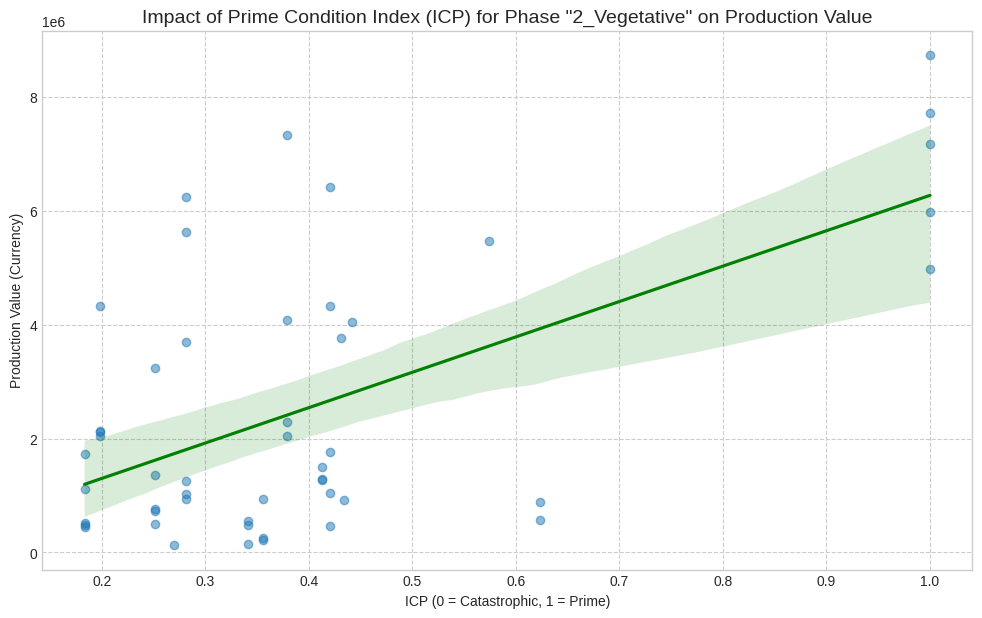


--- STRATEGY 2: CLIMATE STRESS SYNERGY INDEX (ISEC) ---


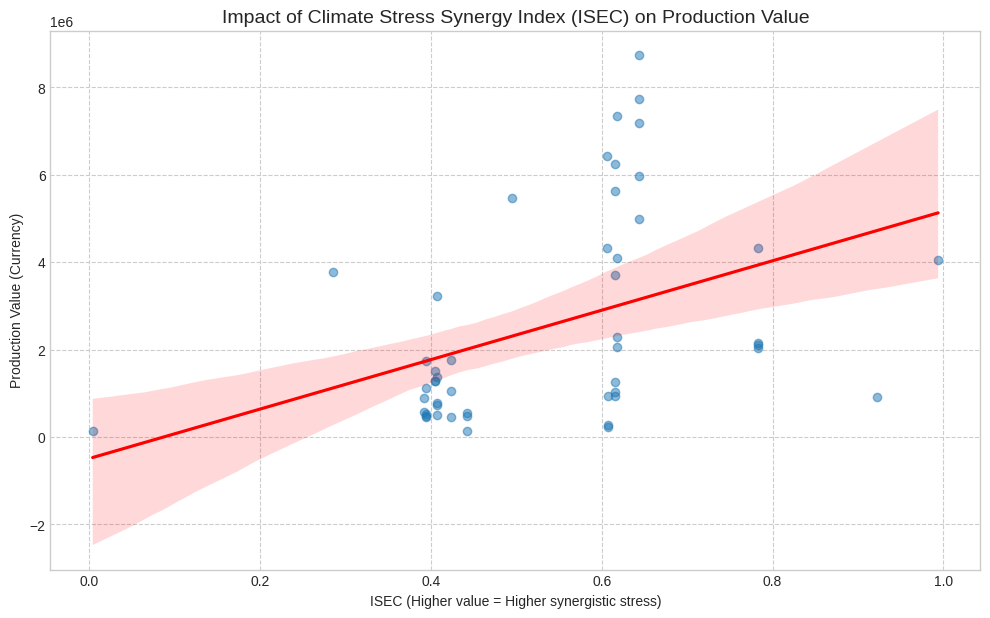


--- STRATEGY 3: PHENOLOGICAL PRIMING COST/BENEFIT INDEX (ICBCF) ---


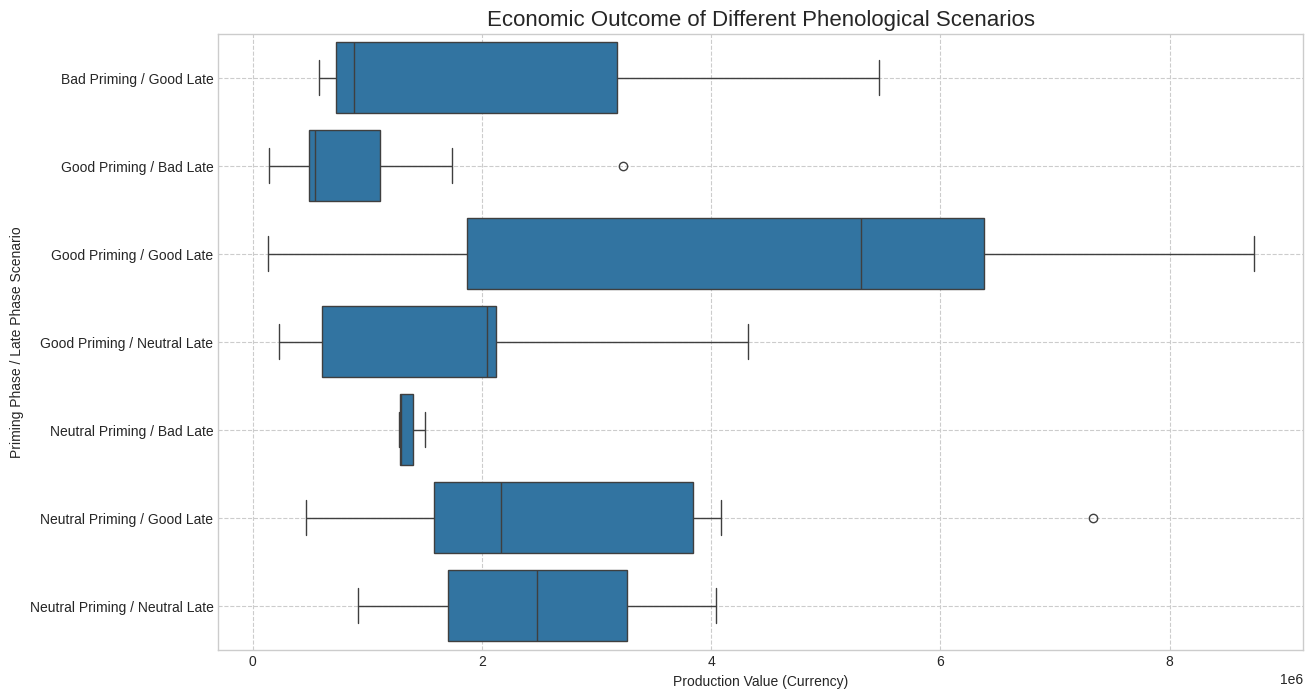


Costo de Oportunidad Irrecuperable de un Mal Comienzo: 2,284,866.75 (Diferencia entre buen y mal 'cebado' con un buen final)
Beneficio de Resiliencia de un Buen Comienzo: 928,713.25 (Diferencia entre buen y mal 'cebado' con un mal final)

--- Full Index Analysis Complete ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import gc

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING AND RECONSTRUCTION (FROM PREVIOUS SCRIPT) ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded & Reconstructing ---")
    df = reduce_mem_usage(df)
    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]
    base_df = df[base_cols + ag_cols].drop_duplicates()
    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]
            melt_subset = df[base_cols + [param_col] + month_cols_suffix]
            melted_df = melt_subset.melt(id_vars=base_cols + [param_col], value_vars=month_cols_suffix, var_name='month', value_name='value')
            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)
    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df; gc.collect()
    season_df_wide = full_long_df.pivot_table(index=base_cols, columns=['parameter', 'month'], values='value')
    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)
    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df; gc.collect()

    # --- PHENOLOGICAL FEATURE ENGINEERING ---
    print("--- Engineering Phenological Features ---")
    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    new_features = {}
    for param in climate_params:
        for phase, phase_months in [('1_Emergence', [f'{param}_{m}' for m in months[:3]]), ('2_Vegetative', [f'{param}_{m}' for m in months[3:6]]), ('3_Flowering', [f'{param}_{m}' for m in months[6:8]]), ('4_Grain_Fill', [f'{param}_{m}' for m in months[8:]])]:
            valid_months = [m for m in phase_months if m in season_df_wide.columns]
            if not valid_months: continue
            for stat in ['mean', 'std', 'max', 'sum']:
                new_features[f'{param}_{stat}_{phase}'] = season_df_wide[valid_months].agg(stat, axis=1)
    new_features_df = pd.DataFrame(new_features)
    season_df_wide = pd.concat([season_df_wide, new_features_df], axis=1)
    del new_features_df, new_features; gc.collect()

    season_df_wide.dropna(subset=['ValorProduccion'], inplace=True)

    # --- STRATEGY 1: ÍNDICE DE CONDICIÓN "PRIME" (ICP) ---
    print("\n" + "="*80 + "\n--- STRATEGY 1: PRIME CONDITION INDEX (ICP) ---\n" + "="*80)
    prime_phase = '2_Vegetative'
    prime_features = [col for col in season_df_wide.columns if prime_phase in col and any(stat in col for stat in ['mean', 'std', 'max', 'sum'])]
    X_prime = season_df_wide[prime_features].fillna(0)

    kmeans_prime = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_prime)
    season_df_wide['prime_archetype'] = kmeans_prime.labels_

    archetype_performance = season_df_wide.groupby('prime_archetype')['ValorProduccion'].mean()
    best_archetype_idx = archetype_performance.idxmax()
    worst_archetype_idx = archetype_performance.idxmin()

    prime_centroid = kmeans_prime.cluster_centers_[best_archetype_idx]
    catastrophic_centroid = kmeans_prime.cluster_centers_[worst_archetype_idx]

    dist_to_prime = cdist(X_prime, [prime_centroid])
    dist_to_catastrophic = cdist(X_prime, [catastrophic_centroid])

    season_df_wide['icp'] = dist_to_catastrophic / (dist_to_prime + dist_to_catastrophic)

    plt.figure(figsize=(12, 7))
    sns.regplot(x='icp', y='ValorProduccion', data=season_df_wide, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
    plt.title(f'Impact of Prime Condition Index (ICP) for Phase "{prime_phase}" on Production Value', fontsize=14)
    plt.xlabel(f'ICP (0 = Catastrophic, 1 = Prime)')
    plt.ylabel('Production Value (Currency)')
    plt.grid(True, linestyle='--')
    plt.show()

    # --- STRATEGY 2: ÍNDICE DE SINERGIA DE ESTRÉS CLIMÁTICO (ISEC) ---
    print("\n" + "="*80 + "\n--- STRATEGY 2: CLIMATE STRESS SYNERGY INDEX (ISEC) ---\n" + "="*80)
    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_full = season_df_wide[feature_cols].fillna(0)
    y_full = season_df_wide['ValorProduccion']

    rf_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_full, y_full)
    importances = pd.Series(rf_full.feature_importances_, index=X_full.columns)

    stress_factors = {
        'T2MWET_std_2_Vegetative': {'high_is_bad': True},
        'RH2M_mean_2_Vegetative': {'high_is_bad': False},
        'TS_max_2_Vegetative': {'high_is_bad': True},
        'WD10M_std_2_Vegetative': {'high_is_bad': True}
    }

    stress_df = pd.DataFrame()
    scaler = MinMaxScaler()
    for factor, props in stress_factors.items():
        if factor in season_df_wide.columns:
            scaled_col = scaler.fit_transform(season_df_wide[[factor]].fillna(0))
            if not props['high_is_bad']:
                # FIX: Flatten the 2D array from the scaler to a 1D array
                stress_df[factor] = (1 - scaled_col).flatten()
            else:
                # FIX: Flatten the 2D array from the scaler to a 1D array
                stress_df[factor] = scaled_col.flatten()

    stress_weights = importances[stress_df.columns]
    stress_weights /= stress_weights.sum()

    season_df_wide['isec'] = (stress_df * stress_weights).sum(axis=1)

    plt.figure(figsize=(12, 7))
    sns.regplot(x='isec', y='ValorProduccion', data=season_df_wide, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Impact of Climate Stress Synergy Index (ISEC) on Production Value', fontsize=14)
    plt.xlabel('ISEC (Higher value = Higher synergistic stress)')
    plt.ylabel('Production Value (Currency)')
    plt.grid(True, linestyle='--')
    plt.show()

    # --- STRATEGY 3: ÍNDICE DE COSTO/BENEFICIO DEL CEBADO FENOLÓGICO (ICBCF) ---
    print("\n" + "="*80 + "\n--- STRATEGY 3: PHENOLOGICAL PRIMING COST/BENEFIT INDEX (ICBCF) ---\n" + "="*80)
    priming_phase_cols = [col for col in feature_cols if '_2_Vegetative' in col]
    late_phase_cols = [col for col in feature_cols if '_4_Grain_Fill' in col]

    X_priming = season_df_wide[priming_phase_cols].fillna(0)
    X_late = season_df_wide[late_phase_cols].fillna(0)

    kmeans_priming = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_priming)
    kmeans_late = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_late)

    priming_perf = season_df_wide.assign(cluster=kmeans_priming.labels_).groupby('cluster')['ValorProduccion'].mean()
    late_perf = season_df_wide.assign(cluster=kmeans_late.labels_).groupby('cluster')['ValorProduccion'].mean()

    priming_map = {priming_perf.idxmin(): 'Bad Priming', priming_perf.idxmax(): 'Good Priming'}
    late_map = {late_perf.idxmin(): 'Bad Late', late_perf.idxmax(): 'Good Late'}

    season_df_wide['priming_condition'] = pd.Series(kmeans_priming.labels_).map(priming_map).fillna('Neutral Priming')
    season_df_wide['late_condition'] = pd.Series(kmeans_late.labels_).map(late_map).fillna('Neutral Late')

    season_df_wide['scenario'] = season_df_wide['priming_condition'] + ' / ' + season_df_wide['late_condition']

    plt.figure(figsize=(14, 8))
    order = sorted(season_df_wide['scenario'].unique())
    sns.boxplot(x='ValorProduccion', y='scenario', data=season_df_wide, order=order)
    plt.title('Economic Outcome of Different Phenological Scenarios', fontsize=16)
    plt.xlabel('Production Value (Currency)')
    plt.ylabel('Priming Phase / Late Phase Scenario')
    plt.grid(True, linestyle='--')
    plt.show()

    # Quantify the economic impact
    scenario_values = season_df_wide.groupby('scenario')['ValorProduccion'].mean()
    cost_of_bad_start = scenario_values.get('Good Priming / Good Late', 0) - scenario_values.get('Bad Priming / Good Late', 0)
    benefit_of_good_start = scenario_values.get('Good Priming / Bad Late', 0) - scenario_values.get('Bad Priming / Bad Late', 0)

    print(f"\nCosto de Oportunidad Irrecuperable de un Mal Comienzo: {cost_of_bad_start:,.2f} (Diferencia entre buen y mal 'cebado' con un buen final)")
    print(f"Beneficio de Resiliencia de un Buen Comienzo: {benefit_of_good_start:,.2f} (Diferencia entre buen y mal 'cebado' con un mal final)")

    print("\n--- Full Index Analysis Complete ---")

--- Data Loaded & Reconstructing ---
Mem. usage decreased to  2.72 Mb (46.4% reduction)
--- Engineering Phenological Features ---

--- STRATEGY 1: PRIME CONDITION INDEX (ICP) ---


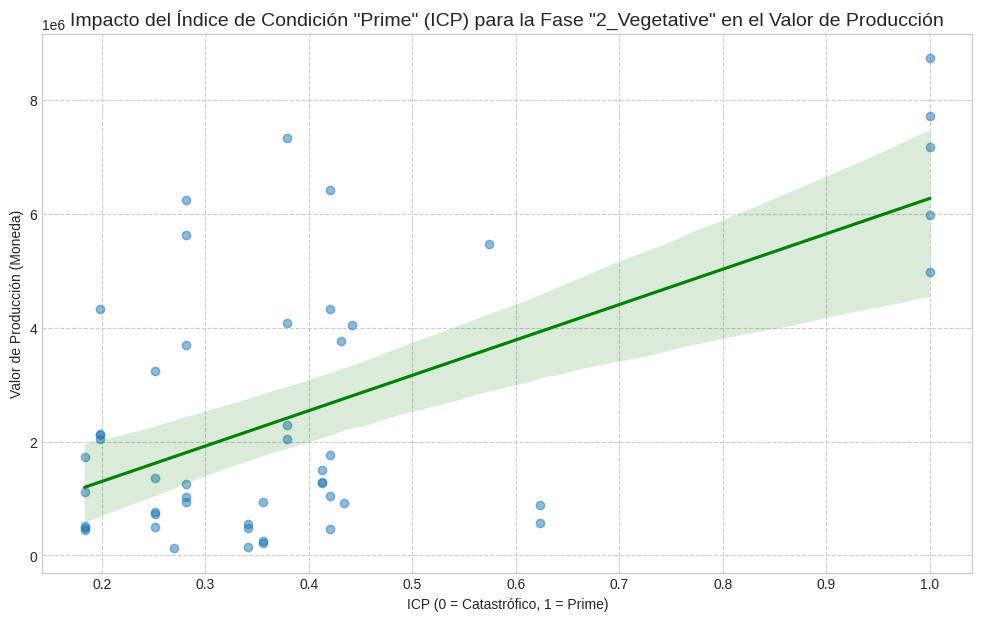


--- STRATEGY 2: CLIMATE STRESS SYNERGY INDEX (ISEC) ---


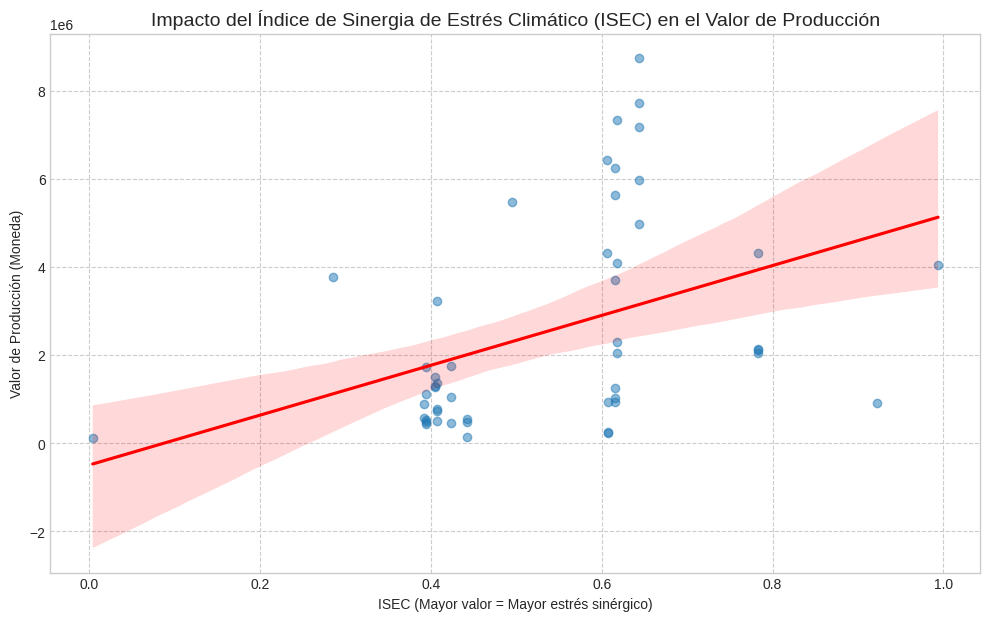


--- STRATEGY 3: PHENOLOGICAL PRIMING COST/BENEFIT INDEX (ICBCF) ---


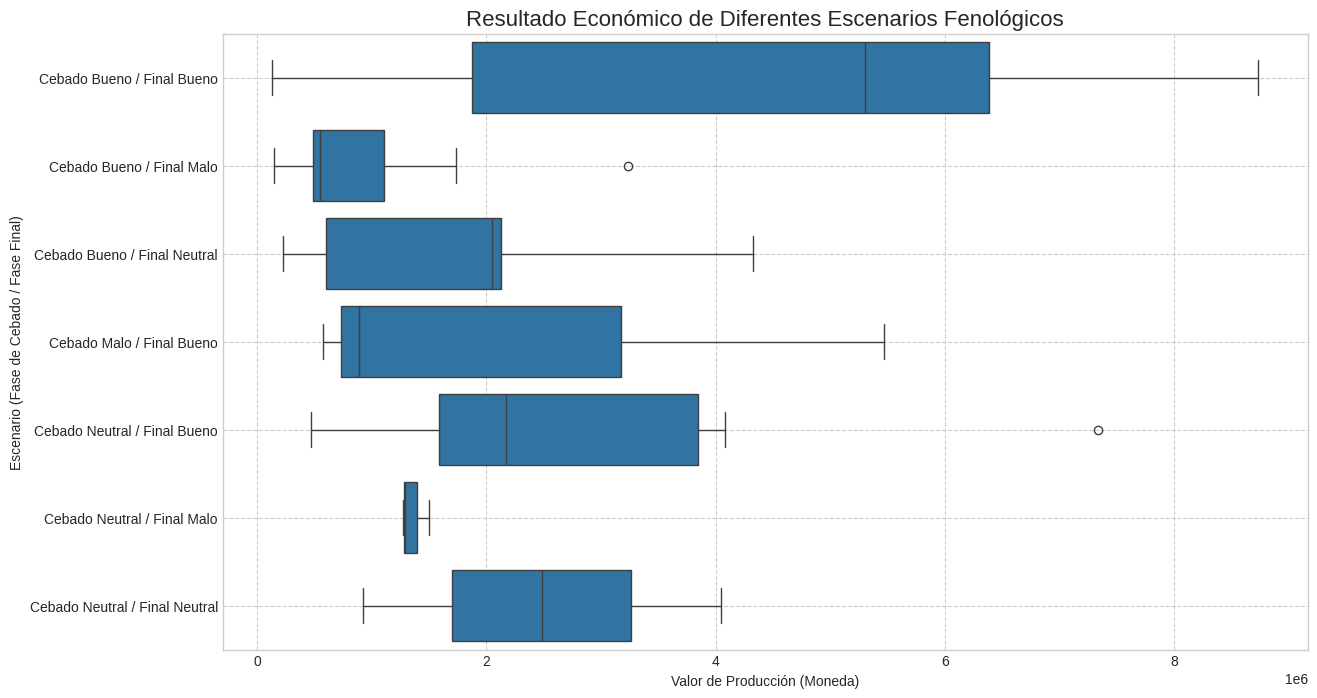


Costo de Oportunidad Irrecuperable de un Mal Comienzo: 2,284,866.75 (Diferencia entre buen y mal 'cebado' con un buen final)
Beneficio de Resiliencia de un Buen Comienzo: 928,713.25 (Diferencia entre buen y mal 'cebado' con un mal final)

--- Análisis Completo de Índices ---


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import gc

# --- OPTIMIZATION FUNCTION ---
def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

# --- DATA LOADING AND RECONSTRUCTION ---
file_path = 'Maiz. Clima.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception:
    df = pd.read_csv(file_path)

if df is not None:
    print("--- Data Loaded & Reconstructing ---")
    df = reduce_mem_usage(df)
    base_cols = ['anio', 'municipio']
    ag_cols = [col for col in ['Superficie', 'Produccion', 'Rendimiento', 'PMR', 'ValorProduccion'] if col in df.columns]
    base_df = df[base_cols + ag_cols].drop_duplicates()
    melted_dfs = []
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    for suffix in ['x', 'y']:
        param_col = f'parameter_{suffix}'
        if param_col in df.columns:
            month_cols_suffix = [f'{m}_{suffix}' for m in months]
            melt_subset = df[base_cols + [param_col] + month_cols_suffix]
            melted_df = melt_subset.melt(id_vars=base_cols + [param_col], value_vars=month_cols_suffix, var_name='month', value_name='value')
            melted_df['month'] = melted_df['month'].str.replace(f'_{suffix}', '', regex=False)
            melted_df.rename(columns={param_col: 'parameter'}, inplace=True)
            melted_dfs.append(melted_df)
    full_long_df = pd.concat(melted_dfs, ignore_index=True).dropna(subset=['parameter', 'value'])
    del melted_dfs, df; gc.collect()
    season_df_wide = full_long_df.pivot_table(index=base_cols, columns=['parameter', 'month'], values='value')
    season_df_wide.columns = [f'{col[0]}_{col[1]}' for col in season_df_wide.columns]
    season_df_wide.reset_index(inplace=True)
    season_df_wide = pd.merge(season_df_wide, base_df, on=base_cols, how='left')
    del full_long_df, base_df; gc.collect()

    # --- PHENOLOGICAL FEATURE ENGINEERING ---
    print("--- Engineering Phenological Features ---")
    climate_params = sorted(list(set([col.split('_')[0] for col in season_df_wide.columns if any(m in col for m in ['_jan', '_feb'])])))
    new_features = {}
    for param in climate_params:
        for phase, phase_months in [('1_Emergence', [f'{param}_{m}' for m in months[:3]]), ('2_Vegetative', [f'{param}_{m}' for m in months[3:6]]), ('3_Flowering', [f'{param}_{m}' for m in months[6:8]]), ('4_Grain_Fill', [f'{param}_{m}' for m in months[8:]])]:
            valid_months = [m for m in phase_months if m in season_df_wide.columns]
            if not valid_months: continue
            for stat in ['mean', 'std', 'max', 'sum']:
                new_features[f'{param}_{stat}_{phase}'] = season_df_wide[valid_months].agg(stat, axis=1)
    new_features_df = pd.DataFrame(new_features)
    season_df_wide = pd.concat([season_df_wide, new_features_df], axis=1)
    del new_features_df, new_features; gc.collect()

    season_df_wide.dropna(subset=['ValorProduccion'], inplace=True)

    # --- STRATEGY 1: ÍNDICE DE CONDICIÓN "PRIME" (ICP) ---
    print("\n" + "="*80 + "\n--- STRATEGY 1: PRIME CONDITION INDEX (ICP) ---\n" + "="*80)
    prime_phase = '2_Vegetative'
    prime_features = [col for col in season_df_wide.columns if prime_phase in col and any(stat in col for stat in ['mean', 'std', 'max', 'sum'])]
    X_prime = season_df_wide[prime_features].fillna(0)

    kmeans_prime = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_prime)
    season_df_wide['prime_archetype'] = kmeans_prime.labels_

    archetype_performance = season_df_wide.groupby('prime_archetype')['ValorProduccion'].mean()
    best_archetype_idx = archetype_performance.idxmax()
    worst_archetype_idx = archetype_performance.idxmin()

    prime_centroid = kmeans_prime.cluster_centers_[best_archetype_idx]
    catastrophic_centroid = kmeans_prime.cluster_centers_[worst_archetype_idx]

    dist_to_prime = cdist(X_prime, [prime_centroid])
    dist_to_catastrophic = cdist(X_prime, [catastrophic_centroid])

    season_df_wide['icp'] = dist_to_catastrophic / (dist_to_prime + dist_to_catastrophic)

    plt.figure(figsize=(12, 7))
    sns.regplot(x='icp', y='ValorProduccion', data=season_df_wide, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
    plt.title(f'Impacto del Índice de Condición "Prime" (ICP) para la Fase "{prime_phase}" en el Valor de Producción', fontsize=14)
    plt.xlabel(f'ICP (0 = Catastrófico, 1 = Prime)')
    plt.ylabel('Valor de Producción (Moneda)')
    plt.grid(True, linestyle='--')
    plt.show()

    # --- STRATEGY 2: ÍNDICE DE SINERGIA DE ESTRÉS CLIMÁTICO (ISEC) ---
    print("\n" + "="*80 + "\n--- STRATEGY 2: CLIMATE STRESS SYNERGY INDEX (ISEC) ---\n" + "="*80)
    feature_cols = [col for col in season_df_wide.columns if any(stat in col for stat in ['_mean_', '_std_', '_max_', '_sum_'])]
    X_full = season_df_wide[feature_cols].fillna(0)
    y_full = season_df_wide['ValorProduccion']

    rf_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_full, y_full)
    importances = pd.Series(rf_full.feature_importances_, index=X_full.columns)

    stress_factors = {
        'T2MWET_std_2_Vegetative': {'high_is_bad': True},
        'RH2M_mean_2_Vegetative': {'high_is_bad': False},
        'TS_max_2_Vegetative': {'high_is_bad': True},
        'WD10M_std_2_Vegetative': {'high_is_bad': True}
    }

    stress_df = pd.DataFrame()
    scaler = MinMaxScaler()
    for factor, props in stress_factors.items():
        if factor in season_df_wide.columns:
            scaled_col = scaler.fit_transform(season_df_wide[[factor]].fillna(0))
            if not props['high_is_bad']:
                stress_df[factor] = (1 - scaled_col).flatten()
            else:
                stress_df[factor] = scaled_col.flatten()

    stress_weights = importances[stress_df.columns]
    stress_weights /= stress_weights.sum()

    season_df_wide['isec'] = (stress_df * stress_weights).sum(axis=1)

    plt.figure(figsize=(12, 7))
    sns.regplot(x='isec', y='ValorProduccion', data=season_df_wide, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('Impacto del Índice de Sinergia de Estrés Climático (ISEC) en el Valor de Producción', fontsize=14)
    plt.xlabel('ISEC (Mayor valor = Mayor estrés sinérgico)')
    plt.ylabel('Valor de Producción (Moneda)')
    plt.grid(True, linestyle='--')
    plt.show()

    # --- STRATEGY 3: ÍNDICE DE COSTO/BENEFICIO DEL CEBADO FENOLÓGICO (ICBCF) ---
    print("\n" + "="*80 + "\n--- STRATEGY 3: PHENOLOGICAL PRIMING COST/BENEFIT INDEX (ICBCF) ---\n" + "="*80)
    priming_phase_cols = [col for col in feature_cols if '_2_Vegetative' in col]
    late_phase_cols = [col for col in feature_cols if '_4_Grain_Fill' in col]

    X_priming = season_df_wide[priming_phase_cols].fillna(0)
    X_late = season_df_wide[late_phase_cols].fillna(0)

    kmeans_priming = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_priming)
    kmeans_late = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_late)

    priming_perf = season_df_wide.assign(cluster=kmeans_priming.labels_).groupby('cluster')['ValorProduccion'].mean()
    late_perf = season_df_wide.assign(cluster=kmeans_late.labels_).groupby('cluster')['ValorProduccion'].mean()

    priming_map = {priming_perf.idxmin(): 'Cebado Malo', priming_perf.idxmax(): 'Cebado Bueno'}
    late_map = {late_perf.idxmin(): 'Final Malo', late_perf.idxmax(): 'Final Bueno'}

    season_df_wide['priming_condition'] = pd.Series(kmeans_priming.labels_).map(priming_map).fillna('Cebado Neutral')
    season_df_wide['late_condition'] = pd.Series(kmeans_late.labels_).map(late_map).fillna('Final Neutral')

    season_df_wide['scenario'] = season_df_wide['priming_condition'] + ' / ' + season_df_wide['late_condition']

    plt.figure(figsize=(14, 8))
    order = sorted(season_df_wide['scenario'].unique())
    sns.boxplot(x='ValorProduccion', y='scenario', data=season_df_wide, order=order)
    plt.title('Resultado Económico de Diferentes Escenarios Fenológicos', fontsize=16)
    plt.xlabel('Valor de Producción (Moneda)')
    plt.ylabel('Escenario (Fase de Cebado / Fase Final)')
    plt.grid(True, linestyle='--')
    plt.show()

    # Quantify the economic impact
    scenario_values = season_df_wide.groupby('scenario')['ValorProduccion'].mean()
    cost_of_bad_start = scenario_values.get('Cebado Bueno / Final Bueno', 0) - scenario_values.get('Cebado Malo / Final Bueno', 0)
    benefit_of_good_start = scenario_values.get('Cebado Bueno / Final Malo', 0) - scenario_values.get('Cebado Malo / Final Malo', 0)

    print(f"\nCosto de Oportunidad Irrecuperable de un Mal Comienzo: {cost_of_bad_start:,.2f} (Diferencia entre buen y mal 'cebado' con un buen final)")
    print(f"Beneficio de Resiliencia de un Buen Comienzo: {benefit_of_good_start:,.2f} (Diferencia entre buen y mal 'cebado' con un mal final)")

    print("\n--- Análisis Completo de Índices ---")

